# Introduction of Project



## Part 1: My project focuses on Analysing Data from past 150 years of Formula One Sport and unlock actionable insights and with the help of Statistics and probability get to the conclusion which Team and Player is the best.

## Part 2: Once Analysis & Statistics are done with data I would be doing a live sentimental analysis using Twitter tweets to determine which Player and Team are most favourite among people.

#### Doing necessary imports 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import streamlit as st

#### Reading races csv & performing preprocessing on the data

In [6]:
races = pd.read_csv('C:/Users/moins/Downloads/archive/races.csv')
df_races = pd.DataFrame(races)
columns_to_drop = ["time", "url","fp1_date","fp1_time","fp2_date","fp2_time","fp3_date","fp3_time","quali_date","quali_time","sprint_date","sprint_time"]
df_races = df_races.drop(columns=columns_to_drop, axis=1)
df_races = df_races.rename(columns={'round': 'race_YTD'})
df_races

,raceId,year,race_YTD,circuitId,name,date
0,1,2009,1,1,Australian Grand Prix,2009-03-29
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05
2,3,2009,3,17,Chinese Grand Prix,2009-04-19
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26
4,5,2009,5,4,Spanish Grand Prix,2009-05-10
...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19


#### Reading circuits csv & performing preprocessing on the data

In [7]:
circuits = pd.read_csv('C:/Users/moins/Downloads/archive/circuits.csv')
df_circuits = pd.DataFrame(circuits)
columns_to_drop = ["circuitRef", "alt","url"]
df_circuits = df_circuits.drop(columns=columns_to_drop, axis=1)
df_circuits

,circuitId,name,location,country,lat,lng
0,1,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800
1,2,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800
2,3,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060
3,4,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111
4,5,Istanbul Park,Istanbul,Turkey,40.95170,29.40500
...,...,...,...,...,...,...
72,75,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670
73,76,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190
74,77,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440
75,78,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420


#### Reading Drivers csv & performing preprocessing on the data

In [8]:
drivers = pd.read_csv('C:/Users/moins/Downloads/archive/drivers.csv')
df_drivers = pd.DataFrame(drivers)
columns_to_drop = ["driverRef", "number","code","url"]
df_drivers = df_drivers.drop(columns=columns_to_drop, axis=1)
df_drivers

,driverId,forename,surname,dob,nationality
0,1,Lewis,Hamilton,1985-01-07,British
1,2,Nick,Heidfeld,1977-05-10,German
2,3,Nico,Rosberg,1985-06-27,German
3,4,Fernando,Alonso,1981-07-29,Spanish
4,5,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...
853,855,Guanyu,Zhou,1999-05-30,Chinese
854,856,Nyck,de Vries,1995-02-06,Dutch
855,857,Oscar,Piastri,2001-04-06,Australian
856,858,Logan,Sargeant,2000-12-31,American


#### Reading Drivers Standing csv & performing preprocessing on the data

In [9]:
drivers_standing = pd.read_csv('C:/Users/moins/Downloads/archive/driver_standings.csv')
df_drivers_standing = pd.DataFrame(drivers_standing)
df_drivers_standing

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34339,72513,1120,839,58.0,12,12,0
34340,72514,1120,844,206.0,5,5,0
34341,72515,1120,857,97.0,9,9,0
34342,72516,1120,817,6.0,17,17,0


#### Reading Constructors csv & performing preprocessing on the data

In [10]:
constructors = pd.read_csv('C:/Users/moins/Downloads/archive/constructors.csv')
df_constructors = pd.DataFrame(constructors)
columns_to_drop = ["constructorRef", "url"]
df_constructors = df_constructors.drop(columns=columns_to_drop, axis=1)
df_constructors = df_constructors.rename(columns={'name': 'Team_name'})
df_constructors

,constructorId,Team_name,nationality
0,1,McLaren,British
1,2,BMW Sauber,German
2,3,Williams,British
3,4,Renault,French
4,5,Toro Rosso,Italian
...,...,...,...
206,209,Manor Marussia,British
207,210,Haas F1 Team,American
208,211,Racing Point,British
209,213,AlphaTauri,Italian


#### Reading Constructor Standings csv & performing preprocessing on the data

In [11]:
constructor_standings = pd.read_csv('C:/Users/moins/Downloads/archive/constructor_standings.csv')
df_constructor_standings = pd.DataFrame(constructor_standings)
df_constructor_standings


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13146,28708,1120,214,120.0,6,6,0
13147,28709,1120,3,28.0,7,7,0
13148,28710,1120,213,25.0,8,8,0
13149,28711,1120,210,12.0,10,10,0


#### Reading constructor results csv & performing preprocessing on the data

In [12]:
constructor_results =pd.read_csv('C:/Users/moins/Downloads/archive/constructor_results.csv')
df_constructor_results = pd.DataFrame(constructor_results)
columns_to_drop = ["status"]
df_constructor_results = df_constructor_results.drop(columns=columns_to_drop, axis=1)
df_constructor_results

,constructorResultsId,raceId,constructorId,points
0,1,18,1,14.0
1,2,18,2,8.0
2,3,18,3,9.0
3,4,18,4,5.0
4,5,18,5,2.0
...,...,...,...,...
12380,16885,1120,213,4.0
12381,16886,1120,214,0.0
12382,16887,1120,3,0.0
12383,16888,1120,210,0.0


#### merging constructor standings with constructors & Races to see standings of team for each race

In [13]:
merged_constructors = pd.merge(pd.merge(df_constructor_standings,df_constructors, on = 'constructorId'),
df_races, on = 'raceId')
df_merged_constructors = pd.DataFrame(merged_constructors)
df_merged_constructors

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Team_name,nationality,year,race_YTD,circuitId,name,date
0,1,18,1,14.0,1,1,1,McLaren,British,2008,1,1,Australian Grand Prix,2008-03-16
1,2,18,2,8.0,3,3,0,BMW Sauber,German,2008,1,1,Australian Grand Prix,2008-03-16
2,3,18,3,9.0,2,2,0,Williams,British,2008,1,1,Australian Grand Prix,2008-03-16
3,4,18,4,5.0,4,4,0,Renault,French,2008,1,1,Australian Grand Prix,2008-03-16
4,5,18,5,2.0,5,5,0,Toro Rosso,Italian,2008,1,1,Australian Grand Prix,2008-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13146,20739,679,183,2.0,5,5,0,Brabham-Climax,British,1967,1,30,South African Grand Prix,1967-01-02
13147,20736,679,170,6.0,2,2,0,Cooper-Climax,British,1967,1,30,South African Grand Prix,1967-01-02
13148,20741,679,176,0.0,7,7,0,Lotus-BRM,British,1967,1,30,South African Grand Prix,1967-01-02
13149,20740,679,184,0.0,6,6,0,LDS-Climax,South African,1967,1,30,South African Grand Prix,1967-01-02


## Constructors Ranking by Year

In [14]:
grouped_constructors = merged_constructors.groupby(['year','Team_name'])['points'].max()

# Display the result
print(grouped_constructors)

year  Team_name   
1958  BRM              18.0
      Connaught         0.0
      Cooper           31.0
      Ferrari          40.0
      Maserati          6.0
                      ...  
2023  Haas F1 Team     12.0
      McLaren         302.0
      Mercedes        409.0
      Red Bull        860.0
      Williams         28.0
Name: points, Length: 910, dtype: float64


### Top 5 Teams over the years with highest constructors score  & Wins

C:\Users\moins\AppData\Local\Temp\ipykernel_19504\1301008121.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='points', hue='Team_name', data=top_teams_data, palette=team_colors, ci=None)


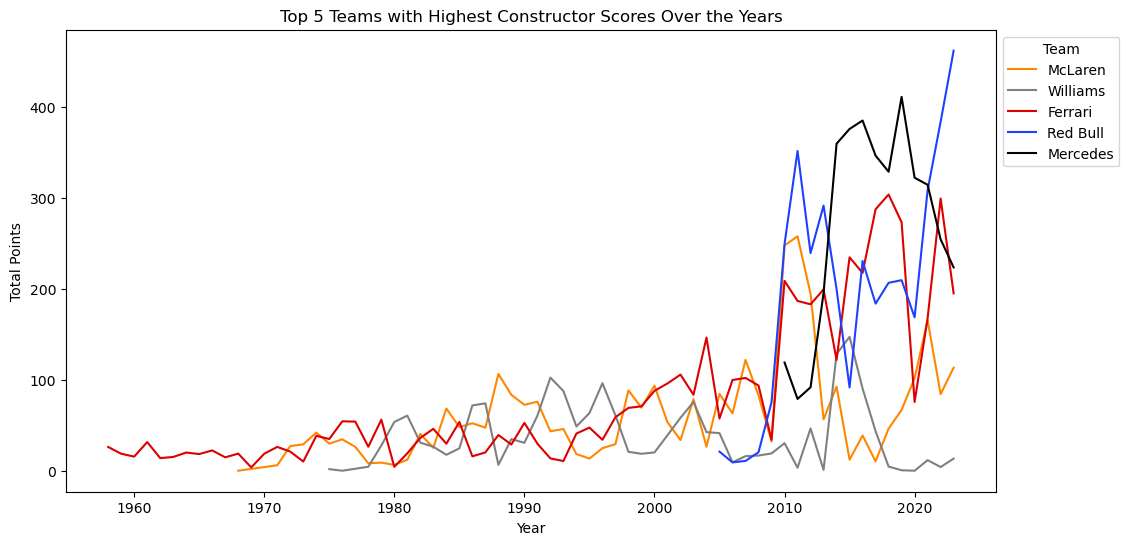

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped_constructors = grouped_constructors.reset_index(drop=True)

# Identify the top 5 teams with the highest scores over the years
top_teams = merged_constructors.groupby('Team_name')['points'].sum().nlargest(5).index

# Filter the DataFrame to include only the top 10 teams
top_teams_data = merged_constructors[merged_constructors['Team_name'].isin(top_teams)]

team_colors = {
    'Red Bull': '#1E41FF',   # Blue for Red Bull
    'Ferrari': '#DC0000',    # Red for Ferrari
    'Mercedes': '#000000',   # Black for Mercedes
    'Williams': '#808080',   # Grey for Williams
    'McLaren': '#FF8700'     # Orange for McLaren
}

# Create a stacked area chart with custom colors
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='points', hue='Team_name', data=top_teams_data, palette=team_colors, ci=None)
plt.title('Top 5 Teams with Highest Constructor Scores Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.legend(title='Team', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### starting to comparing from 2010 inorder to overcome the challenges of point changes over the period of years

In [16]:
grouped_constructors = merged_constructors.groupby(['year','Team_name'])['wins'].max()

# Display the result
print(grouped_constructors)

year  Team_name   
1958  BRM              0
      Connaught        0
      Cooper           2
      Ferrari          2
      Maserati         0
                      ..
2023  Haas F1 Team     0
      McLaren          0
      Mercedes         0
      Red Bull        21
      Williams         0
Name: wins, Length: 910, dtype: int64


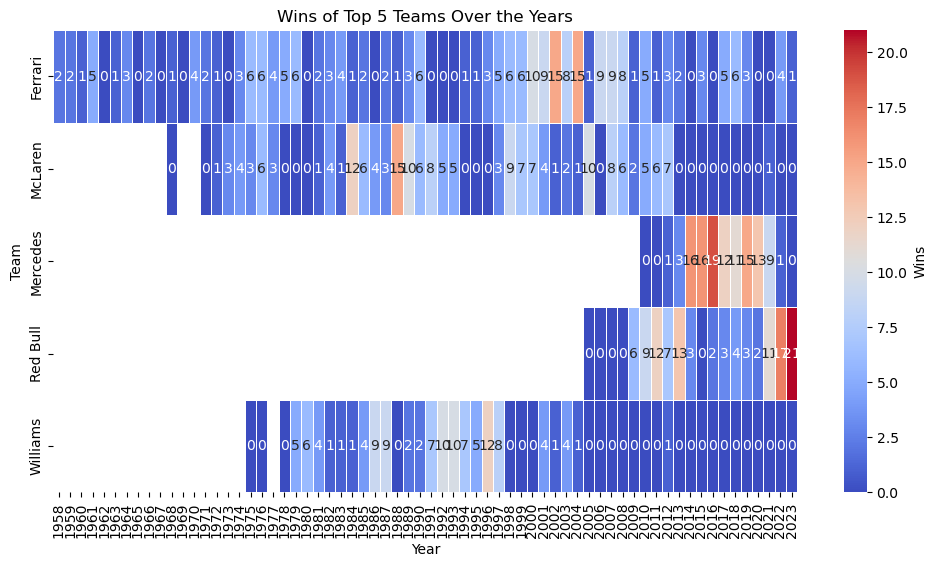

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame with the data
# ...

# Reset the index
grouped_constructors = grouped_constructors.reset_index(drop=True)

# Identify the top 5 teams with the highest wins over the years
top_teams = merged_constructors.groupby('Team_name')['wins'].max().nlargest(5).index

# Filter the DataFrame to include only the top 5 teams
top_teams_data = merged_constructors[merged_constructors['Team_name'].isin(top_teams)]

# Create a pivot table
pivot_table = pd.pivot_table(top_teams_data, values='wins', index=['Team_name'], columns=['year'], aggfunc='max')

# Define custom colors for specific teams
team_colors = {
    'Red Bull': '#1E41FF',   # Blue for Red Bull
    'Ferrari': '#DC0000',    # Red for Ferrari
    'Mercedes': '#000000',   # Black for Mercedes
    'Williams': '#808080',   # Grey for Williams
    'McLaren': '#FF8700'     # Orange for McLaren
}

# Create a heatmap with custom colors
plt.figure(figsize=(12, 6))
cbar_kws = {'label': 'Wins'}
sns.heatmap(pivot_table, cmap="coolwarm", annot=True,
            fmt='g', linewidths=.5, cbar_kws=cbar_kws, xticklabels=pivot_table.columns, yticklabels=pivot_table.index,
            annot_kws={"size": 10})

plt.title('Wins of Top 5 Teams Over the Years')
plt.xlabel('Year')
plt.ylabel('Team')
plt.show()


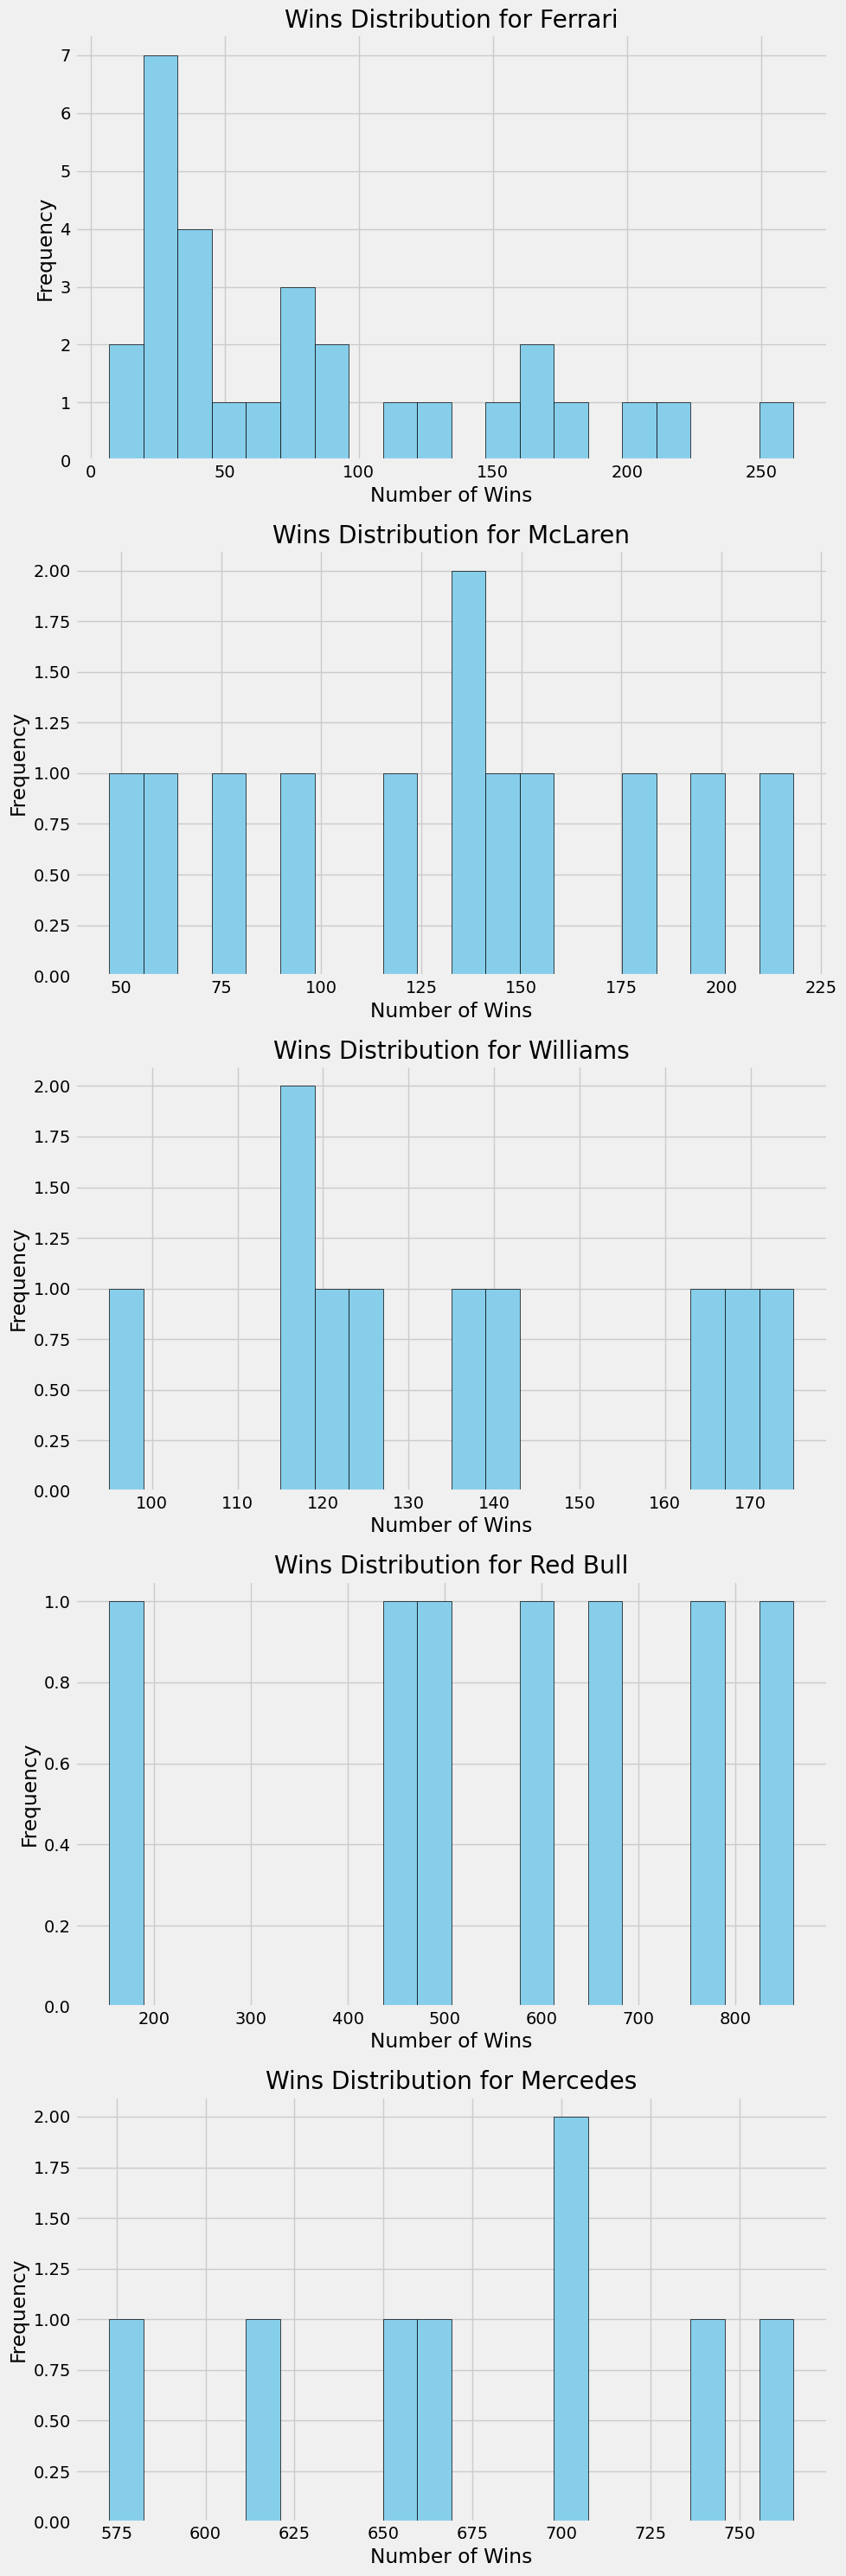

In [313]:
# Plotting the histogram
teams = df_max_points['Team_name'].unique()

# Create a subplot for each team
fig, axes = plt.subplots(nrows=len(teams), figsize=(10, 6 * len(teams)))

# Iterate through each team and plot the histogram
for i, team in enumerate(teams):
    team_data = df_max_points[df_max_points['Team_name'] == team]
    ax = axes[i] if len(teams) > 1 else axes  # Use the same axis if there's only one team
    
    # Plot histogram
    ax.hist(team_data['points'], bins=20, color='skyblue', edgecolor='black')
    
    # Set labels and title
    ax.set_title(f'Wins Distribution for {team}')
    ax.set_xlabel('Number of Wins')
    ax.set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### Top 5 Teams & their wins & points over the years

In [18]:
selected_columns = ['points', 'wins', 'Team_name', 'year', 'name']
df_selected = df_merged_constructors[selected_columns]
top_teams = ['Red Bull', 'Mercedes', 'McLaren', 'Williams', 'Ferrari']
df_filtered = df_selected[df_selected['Team_name'].isin(top_teams)][selected_columns]
df_filtered

,points,wins,Team_name,year,name
0,14.0,1,McLaren,2008,Australian Grand Prix
2,9.0,0,Williams,2008,Australian Grand Prix
5,1.0,0,Ferrari,2008,Australian Grand Prix
6,24.0,1,McLaren,2008,Malaysian Grand Prix
8,9.0,0,Williams,2008,Malaysian Grand Prix
...,...,...,...,...,...
13082,45.0,5,Ferrari,1961,Italian Grand Prix
13095,15.0,1,Ferrari,1961,Dutch Grand Prix
13102,32.0,2,Ferrari,1959,United States Grand Prix
13118,32.0,2,Ferrari,1959,Italian Grand Prix


#### Maximum points scored by them per year

In [19]:
df_max_points = df_filtered.loc[df_filtered.groupby('year')['points'].idxmax()][selected_columns]
df_max_points

,points,wins,Team_name,year,name
12400,40.0,2,Ferrari,1958,Italian Grand Prix
13102,32.0,2,Ferrari,1959,United States Grand Prix
12267,26.0,1,Ferrari,1960,United States Grand Prix
12247,45.0,5,Ferrari,1961,United States Grand Prix
12409,18.0,0,Ferrari,1962,South African Grand Prix
...,...,...,...,...,...
10752,739.0,15,Mercedes,2019,Abu Dhabi Grand Prix
10921,573.0,13,Mercedes,2020,Abu Dhabi Grand Prix
11141,613.5,9,Mercedes,2021,Abu Dhabi Grand Prix
11358,759.0,17,Red Bull,2022,Abu Dhabi Grand Prix


### Bayesian Statistics for Top 5 teams by their wins 
#### Posterior distribution of their wins for the coming year

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_ferrari]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 20 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_mercedes]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 19 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_redbull]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 18 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_mclaren]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 18 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_williams]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 18 seconds.


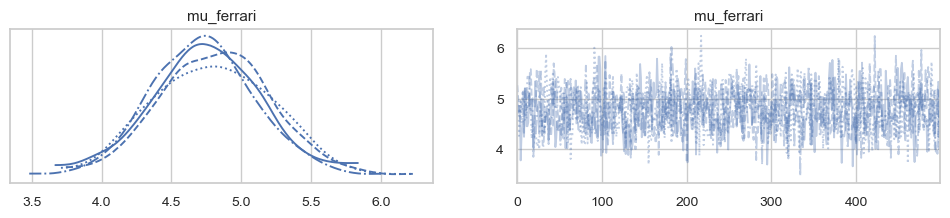

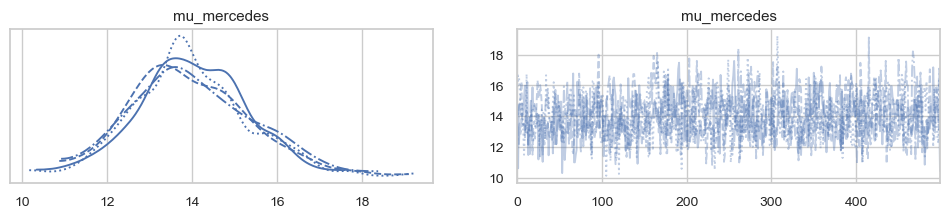

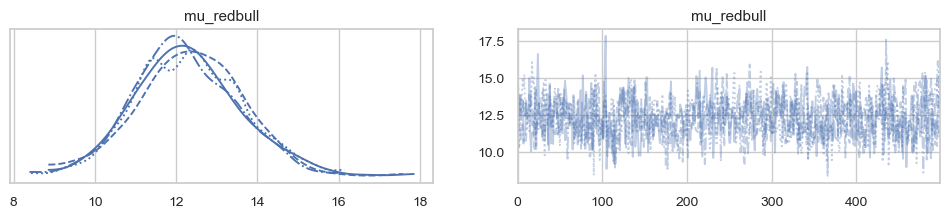

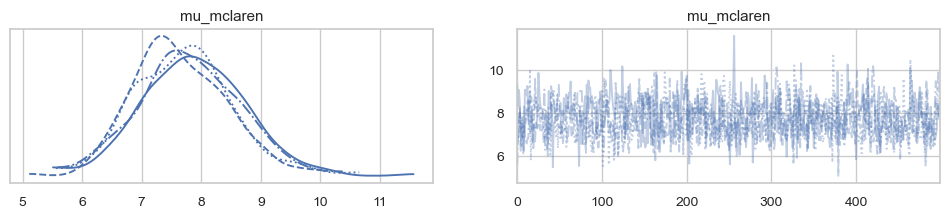

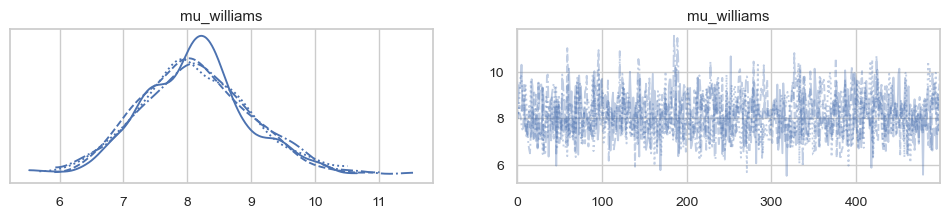

In [238]:
import pymc as pm
import arviz as az
import seaborn as sns
import pandas as pd

# Assuming df_max_points is your DataFrame
ferrari_wins = df_max_points[df_max_points['Team_name'] == 'Ferrari']['wins'].values
mercedes_wins = df_max_points[df_max_points['Team_name'] == 'Mercedes']['wins'].values
redbull_wins = df_max_points[df_max_points['Team_name'] == 'Red Bull']['wins'].values
mclaren_wins = df_max_points[df_max_points['Team_name'] == 'McLaren']['wins'].values
williams_wins = df_max_points[df_max_points['Team_name'] == 'Williams']['wins'].values

# Ferrari Bayesian Model
alpha = 4.6
beta = 1.9
with pm.Model() as ferrari_model:
    mu_ferrari = pm.Normal('mu_ferrari', mu=ferrari_wins.mean(), sigma=10)
    wins_ferrari = pm.Poisson('wins_ferrari', mu=mu_ferrari, observed=ferrari_wins)
    trace_ferrari = pm.sample(500)

# Mercedes Bayesian Model
with pm.Model() as mercedes_model:
    mu_mercedes = pm.Normal('mu_mercedes', mu=mercedes_wins.mean(), sigma=10)
    wins_mercedes = pm.Poisson('wins_mercedes', mu=mu_mercedes, observed=mercedes_wins)
    trace_mercedes = pm.sample(500)

# Red Bull Bayesian Model
with pm.Model() as redbull_model:
    mu_redbull = pm.Normal('mu_redbull', mu=redbull_wins.mean(), sigma=10)
    wins_redbull = pm.Poisson('wins_redbull', mu=mu_redbull, observed=redbull_wins)
    trace_redbull = pm.sample(500)
    
with pm.Model() as mclaren_model:
    mu_mclaren = pm.Normal('mu_mclaren', mu=mclaren_wins.mean(), sigma=10)
    wins_mclaren = pm.Poisson('wins_mclaren', mu=mu_mclaren, observed=mclaren_wins)
    trace_mclaren = pm.sample(500)
    
with pm.Model() as williams_model:
    mu_williams = pm.Normal('mu_williams', mu=williams_wins.mean(), sigma=10)
    wins_williams = pm.Poisson('wins_williams', mu=mu_williams, observed=williams_wins)
    trace_williams = pm.sample(500)

# Visualize Trace Plots
with ferrari_model:
    az.plot_trace(trace_ferrari)
    
with mercedes_model:
    az.plot_trace(trace_mercedes)
    
with redbull_model:
    az.plot_trace(trace_redbull)

with mclaren_model:
    az.plot_trace(trace_mclaren)
    
with williams_model:
    az.plot_trace(trace_williams)

# Access the mean value of 'mu_ferrari' in the 'posterior' group
# Access the correct variable name in the 'posterior' group
mu_ferrari_samples = trace_ferrari['posterior']['mu_ferrari'].values.flatten()
mu_mercedes_samples = trace_mercedes['posterior']['mu_mercedes'].values.flatten()
mu_redbull_samples = trace_redbull['posterior']['mu_redbull'].values.flatten()
mu_mclaren_samples = trace_mclaren['posterior']['mu_mclaren'].values.flatten()
mu_williams_samples = trace_williams['posterior']['mu_williams'].values.flatten()



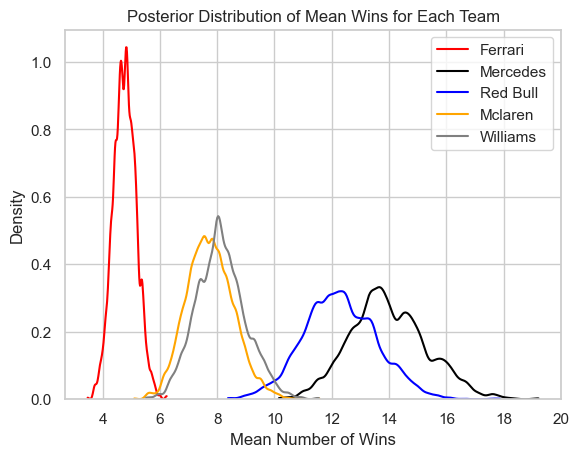

In [239]:
sns.kdeplot(mu_ferrari_samples, cut=0, label='Ferrari', bw_adjust=0.5, color='red')
sns.kdeplot(mu_mercedes_samples, cut=0, label='Mercedes', bw_adjust=0.5, color='black')
sns.kdeplot(mu_redbull_samples, cut=0, label='Red Bull', bw_adjust=0.5, color='blue')
sns.kdeplot(mu_mclaren_samples, cut=0, label='Mclaren', bw_adjust=0.5, color='orange')
sns.kdeplot(mu_williams_samples, cut=0, label='Williams', bw_adjust=0.5, color='grey')

plt.title('Posterior Distribution of Mean Wins for Each Team')
plt.xlabel('Mean Number of Wins')
plt.ylabel('Density')
plt.legend()
plt.show()

## Conclusion from above Analysis

### As we can see the mean number of wins for mercedes & redbull are the most so they would be dominating the coming season but mclaren, williams are not far behind.

#### Reading laptimes csv & performing preprocessing on the data

In [13]:
import pandas as pd
lap_times = pd.read_csv('C:/Users/moins/Downloads/archive/lap_times.csv')
df_lap_times = pd.DataFrame(lap_times)
df_lap_times

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
562502,1120,858,54,18,1:28.923,88923
562503,1120,858,55,18,1:29.025,89025
562504,1120,858,56,18,1:29.430,89430
562505,1120,858,57,17,1:29.265,89265


#### Reading pit stops csv & performing preprocessing on the data

In [14]:
import pandas as pd
pit_stops = pd.read_csv('C:/Users/moins/Downloads/archive/pit_stops.csv')
df_pit_stops = pd.DataFrame(pit_stops)
df_pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
10541,1120,815,2,42,18:06:56,21.274,21274
10542,1120,840,2,42,18:07:20,21.667,21667
10543,1120,830,2,43,18:08:09,21.275,21275
10544,1120,848,2,43,18:09:09,21.919,21919


## Merging the Dataframes to Analysis & Statistics on Pit Stops duration

In [15]:
# merging pitstops with races, constructor & constructor standings data

merged_pit_stops = pd.merge(df_pit_stops, df_races, left_on='raceId', right_on='raceId')
merged_pit_stops = pd.merge(merged_pit_stops, df_constructor_standings[['raceId','constructorId']], on = 'raceId', how='left')
merged_pit_stops = pd.merge(merged_pit_stops, df_constructors, on = 'constructorId', how='left')
merged_pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds,year,race_YTD,circuitId,name,date,constructorId,Team_name,nationality
0,841,153,1,1,17:05:23,26.898,26898,2011,1,1,Australian Grand Prix,2011-03-27,131,Mercedes,German
1,841,153,1,1,17:05:23,26.898,26898,2011,1,1,Australian Grand Prix,2011-03-27,3,Williams,British
2,841,153,1,1,17:05:23,26.898,26898,2011,1,1,Australian Grand Prix,2011-03-27,166,Virgin,British
3,841,153,1,1,17:05:23,26.898,26898,2011,1,1,Australian Grand Prix,2011-03-27,205,Lotus,Malaysian
4,841,153,1,1,17:05:23,26.898,26898,2011,1,1,Australian Grand Prix,2011-03-27,10,Force India,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112183,1120,832,2,56,18:28:24,21.564,21564,2023,22,24,Abu Dhabi Grand Prix,2023-11-26,214,Alpine F1 Team,French
112184,1120,832,2,56,18:28:24,21.564,21564,2023,22,24,Abu Dhabi Grand Prix,2023-11-26,3,Williams,British
112185,1120,832,2,56,18:28:24,21.564,21564,2023,22,24,Abu Dhabi Grand Prix,2023-11-26,213,AlphaTauri,Italian
112186,1120,832,2,56,18:28:24,21.564,21564,2023,22,24,Abu Dhabi Grand Prix,2023-11-26,210,Haas F1 Team,American


In [16]:
selected_columns = ['name', 'date', 'duration', 'Team_name', 'circuitId']

# Rename the columns for clarity
column_mapping = {
    'name': 'Race_Name',
    'date': 'Race_Date',
    'duration': 'Pit_Stop_Duration',
    'Team_name': 'Constructor_Team',
    'circuitId' : 'circuit_id'
}

# Select and rename columns
merged_pit_stops = merged_pit_stops[selected_columns].rename(columns=column_mapping)

# Display the selected data
print(merged_pit_stops)

                    Race_Name   Race_Date Pit_Stop_Duration Constructor_Team  \
0       Australian Grand Prix  2011-03-27            26.898         Mercedes   
1       Australian Grand Prix  2011-03-27            26.898         Williams   
2       Australian Grand Prix  2011-03-27            26.898           Virgin   
3       Australian Grand Prix  2011-03-27            26.898            Lotus   
4       Australian Grand Prix  2011-03-27            26.898      Force India   
...                       ...         ...               ...              ...   
112183   Abu Dhabi Grand Prix  2023-11-26            21.564   Alpine F1 Team   
112184   Abu Dhabi Grand Prix  2023-11-26            21.564         Williams   
112185   Abu Dhabi Grand Prix  2023-11-26            21.564       AlphaTauri   
112186   Abu Dhabi Grand Prix  2023-11-26            21.564     Haas F1 Team   
112187   Abu Dhabi Grand Prix  2023-11-26            21.564          McLaren   

        circuit_id  
0                1

#### Grouping by circuit ID to see fastest pitstops for each circuit till date

In [17]:
df_merged_pit_stops = merged_pit_stops.sort_values(by='Race_Date', ascending=False)

# Find the index of the first occurrence of each circuit in the sorted DataFrame
latest_indices = df_merged_pit_stops.groupby('circuit_id').head(1).index

# Extract the rows corresponding to the latest occurrences
latest_pit_stops = df_merged_pit_stops.loc[latest_indices]

# Display the result
print(latest_pit_stops[['Race_Name', 'Race_Date', 'Pit_Stop_Duration', 'Constructor_Team', 'circuit_id']])

                        Race_Name   Race_Date Pit_Stop_Duration  \
112187       Abu Dhabi Grand Prix  2023-11-26            21.564   
111619       Las Vegas Grand Prix  2023-11-19            21.242   
111059       São Paulo Grand Prix  2023-11-05         23:30.984   
110579     Mexico City Grand Prix  2023-10-29            22.844   
110231   United States Grand Prix  2023-10-22            24.245   
109740           Qatar Grand Prix  2023-10-08            28.984   
109266        Japanese Grand Prix  2023-09-24            41.499   
108968       Singapore Grand Prix  2023-09-17            31.475   
108713         Italian Grand Prix  2023-09-03            24.215   
107956           Dutch Grand Prix  2023-08-27            19.607   
107366         Belgian Grand Prix  2023-07-30            23.090   
107011       Hungarian Grand Prix  2023-07-23            21.171   
106730         British Grand Prix  2023-07-09            28.655   
106226        Austrian Grand Prix  2023-07-02            25.65

#### Barchart for top teams who have done the Fastest pitstops

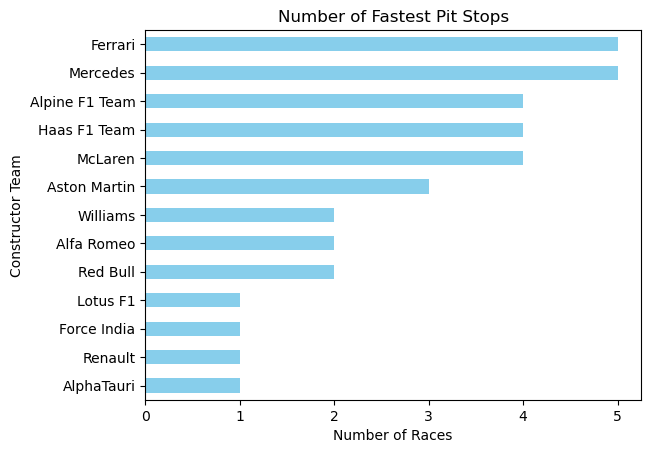

In [43]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
team_counts = latest_pit_stops['Constructor_Team'].value_counts()

# Sort the team counts in descending order
team_counts = team_counts.sort_values(ascending=True)

team_counts.plot(kind='barh', color='skyblue')  # Use 'barh' for horizontal bar chart
plt.title('Number of Fastest Pit Stops')
plt.xlabel('Number of Races')
plt.ylabel('Constructor Team')
plt.show()



#### Barchart for maximum pit stops over the years and we can see teams are imporving with their fastest pitstops year by year and most fast pitsops are done in 2023

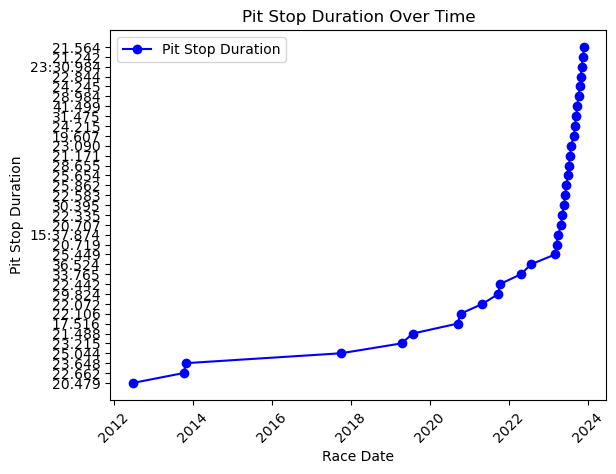

In [18]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
latest_pit_stops['Race_Date'] = pd.to_datetime(latest_pit_stops['Race_Date'])
df_Pit_stop_Duration_over_Time = latest_pit_stops.sort_values('Race_Date')

plt.plot(df_Pit_stop_Duration_over_Time['Race_Date'], df_Pit_stop_Duration_over_Time['Pit_Stop_Duration'], linestyle='-', marker='o', color='blue', label='Pit Stop Duration')
plt.title('Pit Stop Duration Over Time')
plt.xlabel('Race Date')
plt.ylabel('Pit Stop Duration')
plt.xticks(rotation=45)
plt.legend()
plt.show()


#### Merging with circuit to see on which circuit fastest pitsops were done

In [47]:


df_Pit_stop_Duration_over_Time = pd.merge(df_Pit_stop_Duration_over_Time, df_circuits[['circuitId','name']], left_on='circuit_id', right_on='circuitId', how='left')
df_Pit_stop_Duration_over_Time = df_Pit_stop_Duration_over_Time.drop(['circuitId_x', 'name_y', 'circuitId_y'], axis=1)


In [56]:
df_Pit_stop_Duration_over_Time

,Race_Name,Race_Date,Pit_Stop_Duration,Constructor_Team,circuit_id,name_x,circuitId,name
15,Australian Grand Prix,2023-04-02,15:37.874,Mercedes,1,Albert Park Grand Prix Circuit,1,Albert Park Grand Prix Circuit
6,Tuscan Grand Prix,2020-09-13,17.516,McLaren,76,Autodromo Internazionale del Mugello,76,Autodromo Internazionale del Mugello
25,Dutch Grand Prix,2023-08-27,19.607,Haas F1 Team,39,Circuit Park Zandvoort,39,Circuit Park Zandvoort
0,European Grand Prix,2012-06-24,20.479,Williams,12,Valencia Street Circuit,12,Valencia Street Circuit
16,Azerbaijan Grand Prix,2023-04-30,20.707,Ferrari,73,Baku City Circuit,73,Baku City Circuit
14,Saudi Arabian Grand Prix,2023-03-19,20.719,Haas F1 Team,77,Jeddah Corniche Circuit,77,Jeddah Corniche Circuit
23,Hungarian Grand Prix,2023-07-23,21.171,Mercedes,11,Hungaroring,11,Hungaroring
33,Las Vegas Grand Prix,2023-11-19,21.242,Aston Martin,80,Las Vegas Strip Street Circuit,80,Las Vegas Strip Street Circuit
5,German Grand Prix,2019-07-28,21.488,Red Bull,10,Hockenheimring,10,Hockenheimring
34,Abu Dhabi Grand Prix,2023-11-26,21.564,McLaren,24,Yas Marina Circuit,24,Yas Marina Circuit


#### Below bar chart shows the Fastest pitstops by team at circuits

C:\Users\moins\AppData\Local\Temp\ipykernel_19504\1946837136.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


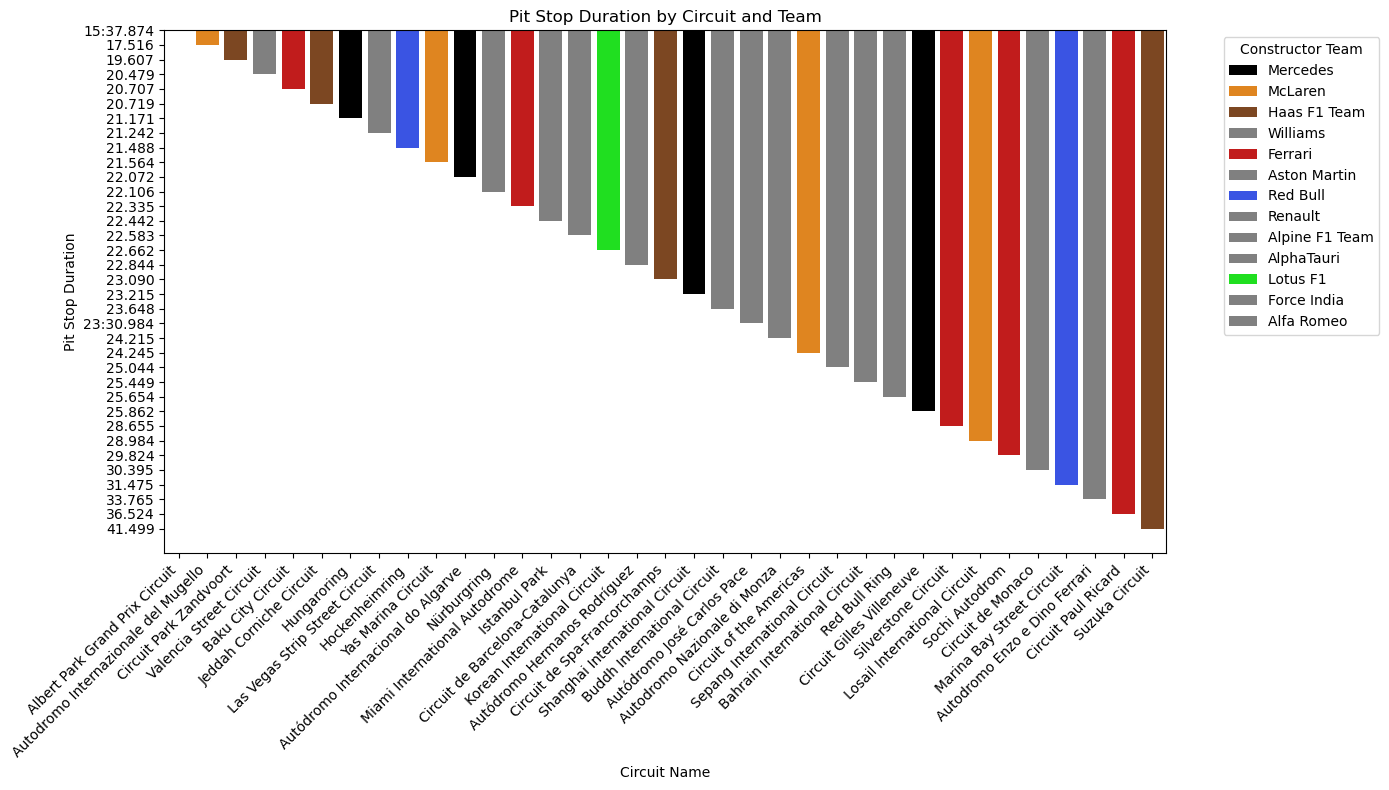

In [59]:
# Team colors
team_colors = {
    'Red Bull': '#1E41FF',   # Blue for Red Bull
    'Ferrari': '#DC0000',    # Red for Ferrari
    'Mercedes': '#000000',   # Black for Mercedes
    'Williams': '#808080',   # Grey for Williams
    'McLaren': '#FF8700',    # Orange for McLaren
    'HRT': '#FFD700',        # Gold for HRT
    'Lotus F1': '#00FF00',   # Green for Lotus F1
    'Caterham': '#FF69B4',   # Pink for Caterham
    'Haas F1 Team': '#8B4513'  # SaddleBrown for Haas F1 Team
}


# Extract unique constructor team names from the DataFrame
unique_teams = df_Pit_stop_Duration_over_Time['Constructor_Team'].unique()

# Update team_colors dictionary with unique teams and default color if not present
for team in unique_teams:
    team_colors.setdefault(team, '#808080')  # Default to grey if not specified

# Assuming df is your DataFrame
plt.figure(figsize=(14, 8))
sns.barplot(
    x='name_x', 
    y='Pit_Stop_Duration', 
    hue='Constructor_Team', 
    data=df_Pit_stop_Duration_over_Time, 
    ci=None,
    palette=team_colors
)
plt.title('Pit Stop Duration by Circuit and Team')
plt.xlabel('Circuit Name')
plt.ylabel('Pit Stop Duration')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Running a monte carlo simulation to see how many milliseconds teams can imporve with their pitstops by running 1000 simulations

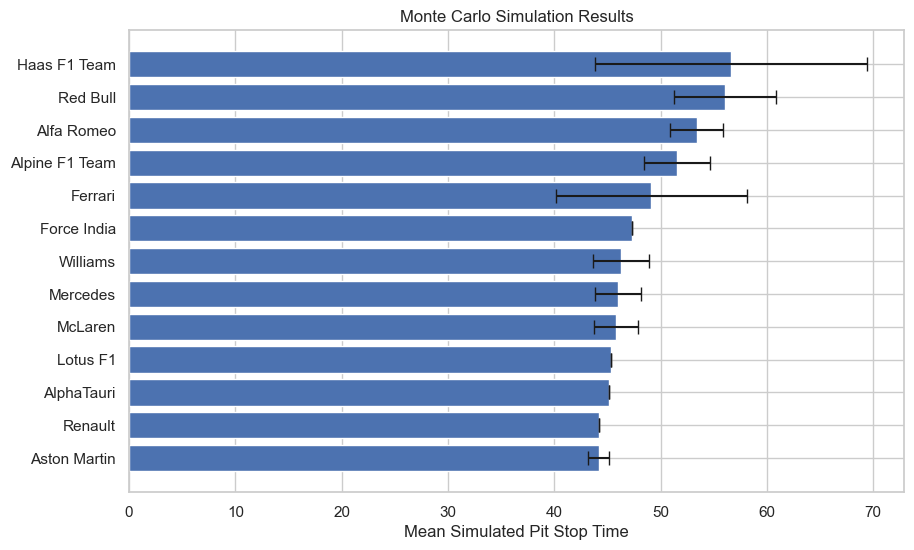

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df_Pit_stop_Duration_over_Time'
# Assuming 'Pit_Stop_Duration' is the column representing pit stop times

# Data Cleaning
df_Pit_stop_Duration_over_Time_cleaned = df_Pit_stop_Duration_over_Time.dropna()

# Simulation Setup
num_simulations = 1000  # adjust as needed
simulated_improvements = []

# Monte Carlo Simulation
for team in df_Pit_stop_Duration_over_Time_cleaned['Constructor_Team'].unique():
    team_data = df_Pit_stop_Duration_over_Time_cleaned[df_Pit_stop_Duration_over_Time_cleaned['Constructor_Team'] == team]['Pit_Stop_Duration'].values
    mean_improvement = np.mean(team_data)  # Use your own method to define the improvement distribution
    std_dev_improvement = np.std(team_data)  # Use your own method to define the improvement distribution
    
    # Generate improvements for each row in team_data
    improvements = np.random.normal(loc=mean_improvement, scale=std_dev_improvement, size=len(team_data))
    simulated_improvements.append((team, improvements))

# Analysis
results = []
for team, improvements in simulated_improvements:
    team_data = df_Pit_stop_Duration_over_Time_cleaned[df_Pit_stop_Duration_over_Time_cleaned['Constructor_Team'] == team]['Pit_Stop_Duration']
    
    # Add the improvements to the team's pit stop times
    simulated_pit_stop_times = team_data + improvements
    
    results.append((team, np.mean(simulated_pit_stop_times), np.std(simulated_pit_stop_times)))

# Visualization
results_df = pd.DataFrame(results, columns=['Constructor_Team', 'Mean_Simulated_Pit_Stop', 'Std_Dev_Simulated_Pit_Stop'])
results_df.sort_values(by='Mean_Simulated_Pit_Stop', inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(results_df['Constructor_Team'], results_df['Mean_Simulated_Pit_Stop'], xerr=results_df['Std_Dev_Simulated_Pit_Stop'], capsize=5)
plt.xlabel('Mean Simulated Pit Stop Time')
plt.title('Monte Carlo Simulation Results')
plt.show()


## Conclusion
### We can see that Ferrari & Haas F1 are the teams can reduce their pitstops time furthure by given milliseconds

#### Merging the dataframes to get Laptimes for the teams

In [60]:
import pandas as pd

# Assuming you have already loaded the DataFrames: df_lap_times, df_constructors, df_drivers, df_races

# Merge df_lap_times with df_races to get race information
merged_laps_races = pd.merge(df_lap_times, df_races[['raceId', 'name', 'circuitId', 'date']], on='raceId', how='left')

# Merge with df_drivers to get driver information
merged_laps_races_drivers = pd.merge(merged_laps_races, df_drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')

#merged_laps_constructor = pd.merge(merged_laps_races_drivers, df_constructor_standings[['constructorId','raceId']], on='raceId', how='left')

#merged_laps_Team = pd.merge(merged_laps_constructor, df_constructors[['Team_name','constructorId']], on='constructorId', how='left')

#merged_laps_Team = merged_laps_Team[['lap', 'position', 'time', 'milliseconds', 'name','date','forename', 'surname',  'Team_name']]

#merged_laps_Team.columns = ['lap_of_race','driver_position','lap_time','millisecond','grandprix_name','date_of_grandprix','DriverForename', 'DriverSurname', 'Team_Name']

#df_lap_data = pd.DataFrame(merged_laps_Team)

#df_lap_data

df_merged_laps_races_drivers = pd.DataFrame(merged_laps_races_drivers)

### Putting the laptime data in proper format to compare them easily 

In [61]:
import pandas as pd

# Assuming your data is stored in a DataFrame named 'df'
# If not, you can create a DataFrame using pd.DataFrame(your_data)

def custom_time_parser(time_str):
    try:
        # Attempt to parse as %H:%M:%S.%f
        return pd.to_datetime(time_str, format='%H:%M:%S.%f').time()
    except ValueError:
        # If parsing fails, try %M:%S.%f
        return pd.to_datetime(time_str, format='%M:%S.%f').time()

# Apply the custom time parser to the 'time' column
df_merged_laps_races_drivers['time'] = df_merged_laps_races_drivers['time'].apply(custom_time_parser)

# Find the index of the fastest lap for each raceId
fastest_laps_indices = df_merged_laps_races_drivers.groupby('raceId')['time'].idxmin()

# Extract the rows corresponding to the fastest laps
fastest_laps = df_merged_laps_races_drivers.loc[fastest_laps_indices]

# Display the result
print(fastest_laps[['raceId', 'driverId', 'lap', 'position', 'time', 'name', 'circuitId', 'date', 'forename', 'surname']])


        raceId  driverId  lap  position             time  \
343626       1         3   48         7  00:01:27.706000   
344395       2        18   18         1  00:01:36.641000   
345448       3        22   42         4  00:01:52.592000   
345925       4        15   10         2  00:01:34.556000   
347491       5        22   28         1  00:01:22.762000   
...        ...       ...  ...       ...              ...   
557525    1116       852   56        10  00:01:38.139000   
558375    1117         1   71         2  00:01:21.334000   
559432    1118       846   61         2  00:01:12.486000   
561044    1119       857   47        11  00:01:35.490000   
561394    1120       830   45         1  00:01:26.993000   

                            name  circuitId        date forename      surname  
343626     Australian Grand Prix          1  2009-03-29     Nico      Rosberg  
344395      Malaysian Grand Prix          2  2009-04-05   Jenson       Button  
345448        Chinese Grand Prix       

In [62]:
df_fastest_laps = pd.DataFrame(fastest_laps)
df_fastest_laps

,raceId,driverId,lap,position,time,milliseconds,name,circuitId,date,forename,surname
343626,1,3,48,7,00:01:27.706000,87706,Australian Grand Prix,1,2009-03-29,Nico,Rosberg
344395,2,18,18,1,00:01:36.641000,96641,Malaysian Grand Prix,2,2009-04-05,Jenson,Button
345448,3,22,42,4,00:01:52.592000,112592,Chinese Grand Prix,17,2009-04-19,Rubens,Barrichello
345925,4,15,10,2,00:01:34.556000,94556,Bahrain Grand Prix,3,2009-04-26,Jarno,Trulli
347491,5,22,28,1,00:01:22.762000,82762,Spanish Grand Prix,4,2009-05-10,Rubens,Barrichello
...,...,...,...,...,...,...,...,...,...,...,...
557525,1116,852,56,10,00:01:38.139000,98139,United States Grand Prix,69,2023-10-22,Yuki,Tsunoda
558375,1117,1,71,2,00:01:21.334000,81334,Mexico City Grand Prix,32,2023-10-29,Lewis,Hamilton
559432,1118,846,61,2,00:01:12.486000,72486,São Paulo Grand Prix,18,2023-11-05,Lando,Norris
561044,1119,857,47,11,00:01:35.490000,95490,Las Vegas Grand Prix,80,2023-11-19,Oscar,Piastri


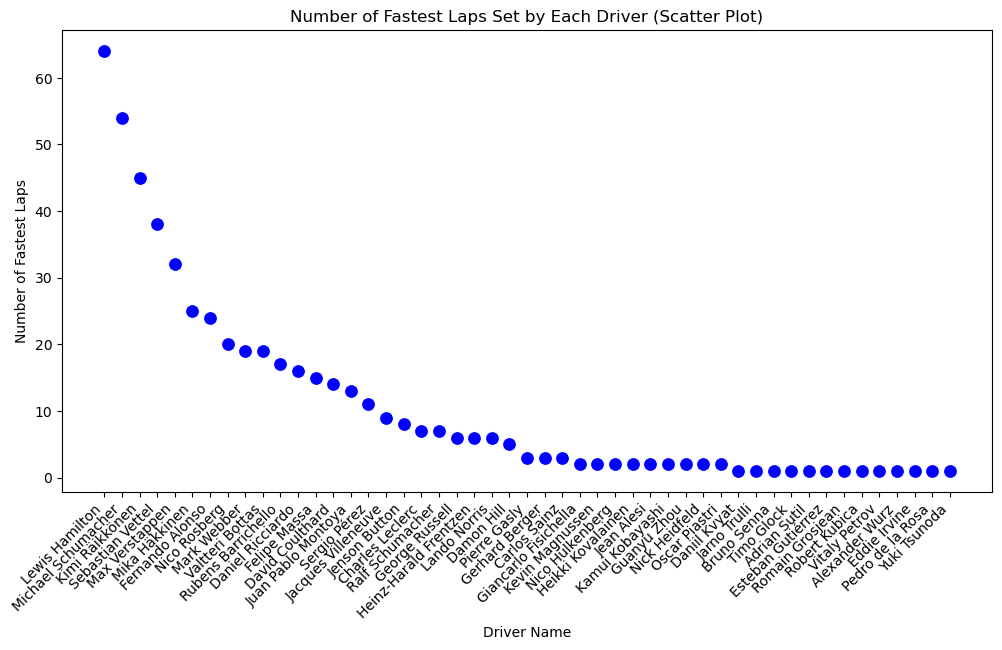

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine forename and lastname for each driver
fastest_laps['full_name'] = fastest_laps['forename'] + ' ' + fastest_laps['surname']

# Count the number of fastest laps each driver has set
driver_fastest_laps_count = fastest_laps['full_name'].value_counts()

# Create a scatter plot using seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(x=driver_fastest_laps_count.index, y=driver_fastest_laps_count.values, color="blue", s=100)
plt.xlabel('Driver Name')
plt.ylabel('Number of Fastest Laps')
plt.title('Number of Fastest Laps Set by Each Driver (Scatter Plot)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


### These are the drivers who have set fastest laps

In [103]:
import pandas as pd

# Assuming your data is stored in a DataFrame named 'df_merged_laps_races_drivers'
# If not, you can create a DataFrame using pd.DataFrame(your_data)

def custom_time_parser(time_str):
    try:
        # Attempt to parse as %H:%M:%S.%f
        return pd.to_datetime(time_str, format='%H:%M:%S.%f').time()
    except ValueError:
        # If parsing fails, try %M:%S.%f
        return pd.to_datetime(time_str, format='%M:%S.%f').time()

# Apply the custom time parser to the 'time' column
df_merged_laps_races_drivers['time'] = df_merged_laps_races_drivers['time'].apply(custom_time_parser)

# Find the index of the fastest lap for each raceId
fastest_laps_indices = df_merged_laps_races_drivers.groupby('raceId')['time'].idxmin()

# Extract the rows corresponding to the fastest laps
fastest_laps = df_merged_laps_races_drivers.loc[fastest_laps_indices]

# Count the number of fastest laps each driver has set
driver_fastest_laps_count = fastest_laps['forename'].value_counts().reset_index()

# Rename the columns for clarity
driver_fastest_laps_count.columns = ['Driver', 'FastestLapsCount']

# Display the result
print(driver_fastest_laps_count)


          Driver  FastestLapsCount
0          Lewis                64
1        Michael                54
2           Kimi                45
3      Sebastian                38
4            Max                32
5           Mika                25
6       Fernando                24
7           Nico                22
8           Mark                19
9       Valtteri                19
10        Rubens                17
11        Daniel                16
12        Felipe                15
13         David                14
14          Juan                13
15        Sergio                11
16       Jacques                 9
17        Jenson                 8
18          Ralf                 7
19       Charles                 7
20        George                 6
21  Heinz-Harald                 6
22         Lando                 6
23         Damon                 5
24        Carlos                 3
25       Gerhard                 3
26        Pierre                 3
27     Giancarlo    

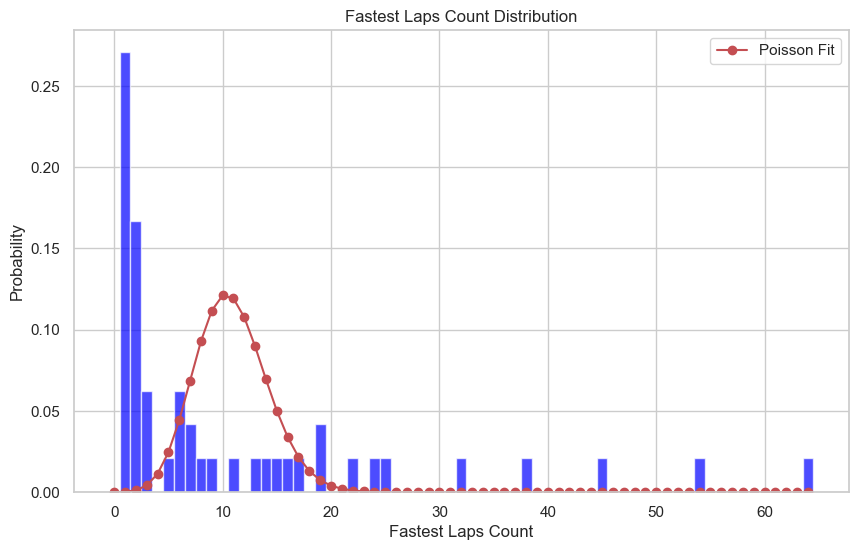

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson


df_driver_fastest_laps_count = pd.DataFrame(driver_fastest_laps_count)

# Fit Poisson distribution to the data
lambda_param = df_driver_fastest_laps_count['FastestLapsCount'].mean()
poisson_dist = poisson(mu=lambda_param)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_driver_fastest_laps_count['FastestLapsCount'], bins=np.arange(0, max(df_driver_fastest_laps_count['FastestLapsCount']) + 2) - 0.5, density=True, alpha=0.7, color='blue')

# Plot fitted Poisson distribution
x = np.arange(0, max(df_driver_fastest_laps_count['FastestLapsCount']) + 1)
plt.plot(x, poisson_dist.pmf(x), 'ro-', label='Poisson Fit')

plt.title('Fastest Laps Count Distribution')
plt.xlabel('Fastest Laps Count')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


### Conclusion - Since the poisson fit doesnt fit properly we can conclude that they are dependent on some other factors

### For our analysis just need to compare lewis hamilton & Max verstappen and hence filtering only the fastest laps that they did on same circuit

In [63]:
# Assuming df_fastest_laps is your DataFrame

# Filter entries for Lewis Hamilton (driverId = 1) and Max Verstappen (driverId = 830)
selected_drivers = df_fastest_laps[df_fastest_laps['driverId'].isin([1, 830])]

# Extract forename entries for Lewis Hamilton and Max Verstappen
lewis_entry = selected_drivers[selected_drivers['driverId'] == 1]
max_entry = selected_drivers[selected_drivers['driverId'] == 830]


# Find the common circuits for Lewis Hamilton and Max Verstappen
common_circuits = set(lewis_entry['circuitId']).intersection(max_entry['circuitId'])

# Filter entries for common circuits
common_circuits_entries_lewis = lewis_entry[lewis_entry['circuitId'].isin(common_circuits)]
common_circuits_entries_max = max_entry[max_entry['circuitId'].isin(common_circuits)]

# Display entries for common circuits
print("Lewis Hamilton's entries in common circuits:")
print(common_circuits_entries_lewis)

print("\nMax Verstappen's entries in common circuits:")
print(common_circuits_entries_max)



Lewis Hamilton's entries in common circuits:
        raceId  driverId  lap  position             time  milliseconds  \
364048     341         1   59         2  00:01:24.357000         84357   
374554     349         1   32         1  00:01:49.069000        109069   
379901     354         1   66         4  00:01:13.851000         73851   
381515     355         1   47         2  00:01:41.274000        101274   
5045       845         1   52         2  00:01:26.727000         86727   
11833      850         1   59         1  00:01:34.302000         94302   
47970      879         1   38         2  00:01:18.069000         78069   
81735      908         1   26         2  00:01:37.176000         97176   
83531      909         1   53         4  00:01:19.908000         79908   
88199      914         1   39         1  00:01:51.600000        111600   
383260     917         1   62         2  00:01:13.555000         73555   
95781      930         1   54         2  00:01:28.270000         88

In [64]:
import pandas as pd

# Circuit IDs to filter
selected_circuit_ids = {3, 4, 70, 7, 6, 9, 10, 11, 75, 13, 39, 77, 18, 20, 21, 22, 24}

# Driver IDs to filter
selected_driver_ids = [830, 1]  # Replace with the actual driver IDs for Max Verstappen and Lewis Hamilton

# Filter the DataFrame
filtered_df = df_fastest_laps[df_fastest_laps['circuitId'].isin(selected_circuit_ids) & df_fastest_laps['driverId'].isin(selected_driver_ids)]

# Group by circuitId and driverId, find the index of the minimum lap time
idx_fastest_laps = filtered_df.groupby(['circuitId', 'driverId'])['milliseconds'].idxmin()

# Get only the rows corresponding to the indices of the fastest laps
fastest_laps_df = filtered_df.loc[idx_fastest_laps]

# Display the DataFrame with only the fastest laps
print("Fastest Laps DataFrame:")
print(fastest_laps_df)





Fastest Laps DataFrame:
        raceId  driverId  lap  position             time  milliseconds  \
408330     971         1   46         3  00:01:32.798000         92798   
487418    1045       830   48         2  00:01:32.014000         92014   
453044    1014         1   54         1  00:01:18.492000         78492   
544785    1105       830   61         1  00:01:16.330000         76330   
495953    1056         1   69         7  00:01:12.909000         72909   
432878     994       830   60         9  00:01:14.260000         74260   
412469     975         1   64         1  00:01:14.551000         74551   
433252     995       830   65         3  00:01:13.864000         73864   
459604    1019         1   52         1  00:01:27.369000         87369   
476352    1034       830   52         2  00:01:27.097000         87097   
438136     999         1   66         1  00:01:15.545000         75545   
460658    1020       830   61         1  00:01:16.645000         76645   
474939    1033

### Running a T Test on Max & Lewis best laptimes on same circuits to see is there are difference between them.

In [351]:
from scipy.stats import ttest_rel

# Convert lap times to milliseconds
fastest_laps_df['lap_time_ms'] = fastest_laps_df['time'].apply(lambda x: x.minute * 60 * 1000 + x.second * 1000 + x.microsecond / 1000)

# Separate the lap times for Max Verstappen and Lewis Hamilton
hamilton_lap_times = fastest_laps_df[fastest_laps_df['driverId'] == 1]['lap_time_ms'].tolist()
verstappen_lap_times = fastest_laps_df[fastest_laps_df['driverId'] == 830]['lap_time_ms'].tolist()

# Perform a paired t-test
t_stat, p_value = ttest_rel(hamilton_lap_times, verstappen_lap_times)

# Display the results
print("\nPaired t-test for Fastest Laps:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")




Paired t-test for Fastest Laps:
T-statistic: 0.6491378323457705
P-value: 0.5254585979302143


#### T-statistic: Since the t-statistic is positive, it indicates that, on average, Lewis Hamilton's lap times are higher than Max Verstappen's lap times. However, the magnitude of the t-statistic is relatively small.

#### P-value: The p-value is 0.5255, which is greater than commonly used significance levels (e.g., 0.05). A higher p-value suggests that the observed differences in lap times are not statistically significant. Therefore, we do not have enough evidence to reject the null hypothesis.

## Hence, we cannot conclude that Max is genuinely better in giving fastest laps 

## Now will do statistics & Analysis of Driver standings & Drivers 

In [2]:
driver_standings =pd.read_csv('C:/Users/moins/Downloads/archive/driver_standings.csv')
df_driver_standings = pd.DataFrame(driver_standings)
# Assuming your DataFrame is named 'df_driver_standings'
df_driver_standings['wins'] = df_driver_standings['wins'].apply(lambda x: 1 if x != 0 else 0)

df_driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34339,72513,1120,839,58.0,12,12,0
34340,72514,1120,844,206.0,5,5,0
34341,72515,1120,857,97.0,9,9,0
34342,72516,1120,817,6.0,17,17,0


#### merging races, circuits & driver standings 
#### Doing Data preprocessing

In [17]:
merged_driver_standings = pd.merge(df_driver_standings, df_races[['raceId', 'name', 'circuitId', 'year']], on='raceId', how='left')
merged_driver_standings = pd.merge(merged_driver_standings, df_circuits[['circuitId', 'name', 'country']], on='circuitId', how='left')
merged_driver_standings = pd.merge(merged_driver_standings, df_drivers[['driverId', 'forename', 'surname', 'nationality']], on='driverId', how='left')
merged_driver_standings['driver_fullname'] = merged_driver_standings['forename'] + ' ' + merged_driver_standings['surname']

selected_columns = ['driverId','raceId','points', 'wins', 'name_x', 'name_y','year', 'position','country', 'driver_fullname', 'nationality']

# Rename the columns for clarity
column_mapping = {
    'driverId':'driverId',
    'raceId' : 'raceId',
    'points': 'points_in_race',
    'wins': 'win',
    'name_x': 'grand_prix_name',
    'year': 'year',
    'position':'position',
    'name_y':'circuit_name',
    'country': 'Race_country',
    'driver_fullname' : 'driver_fullname',
    'nationality': 'driver_nationality'
}

# Select and rename columns
merged_driver_standings = merged_driver_standings[selected_columns].rename(columns=column_mapping)

# Display the selected data
print(merged_driver_standings)



       driverId  raceId  points_in_race  win        grand_prix_name  \
0             1      18            10.0    1  Australian Grand Prix   
1             2      18             8.0    0  Australian Grand Prix   
2             3      18             6.0    0  Australian Grand Prix   
3             4      18             5.0    0  Australian Grand Prix   
4             5      18             4.0    0  Australian Grand Prix   
...         ...     ...             ...  ...                    ...   
34339       839    1120            58.0    0   Abu Dhabi Grand Prix   
34340       844    1120           206.0    0   Abu Dhabi Grand Prix   
34341       857    1120            97.0    0   Abu Dhabi Grand Prix   
34342       817    1120             6.0    0   Abu Dhabi Grand Prix   
34343       859    1120             2.0    0   Abu Dhabi Grand Prix   

                         circuit_name  year  position Race_country  \
0      Albert Park Grand Prix Circuit  2008         1    Australia   
1      

### Drivers & number of times they have won position 1

In [18]:
wins_by_driver = merged_driver_standings.groupby(['driverId','driver_fullname','position'])['win'].sum().reset_index()
wins_position_1 = wins_by_driver[wins_by_driver['position'] == 1]
print(wins_position_1)


       driverId  driver_fullname  position  win
0             1   Lewis Hamilton         1  123
33            3     Nico Rosberg         1   29
50            4  Fernando Alonso         1   52
114           8   Kimi Räikkönen         1   12
133           9    Robert Kubica         1    1
...         ...              ...       ...  ...
9297        642      Nino Farina         1    7
9360        647   Alberto Ascari         1   14
11002       822  Valtteri Bottas         1    5
11082       830   Max Verstappen         1   54
11229       844  Charles Leclerc         1    5

[62 rows x 4 columns]


#### Barchart for drivers & count of their wins in position 1

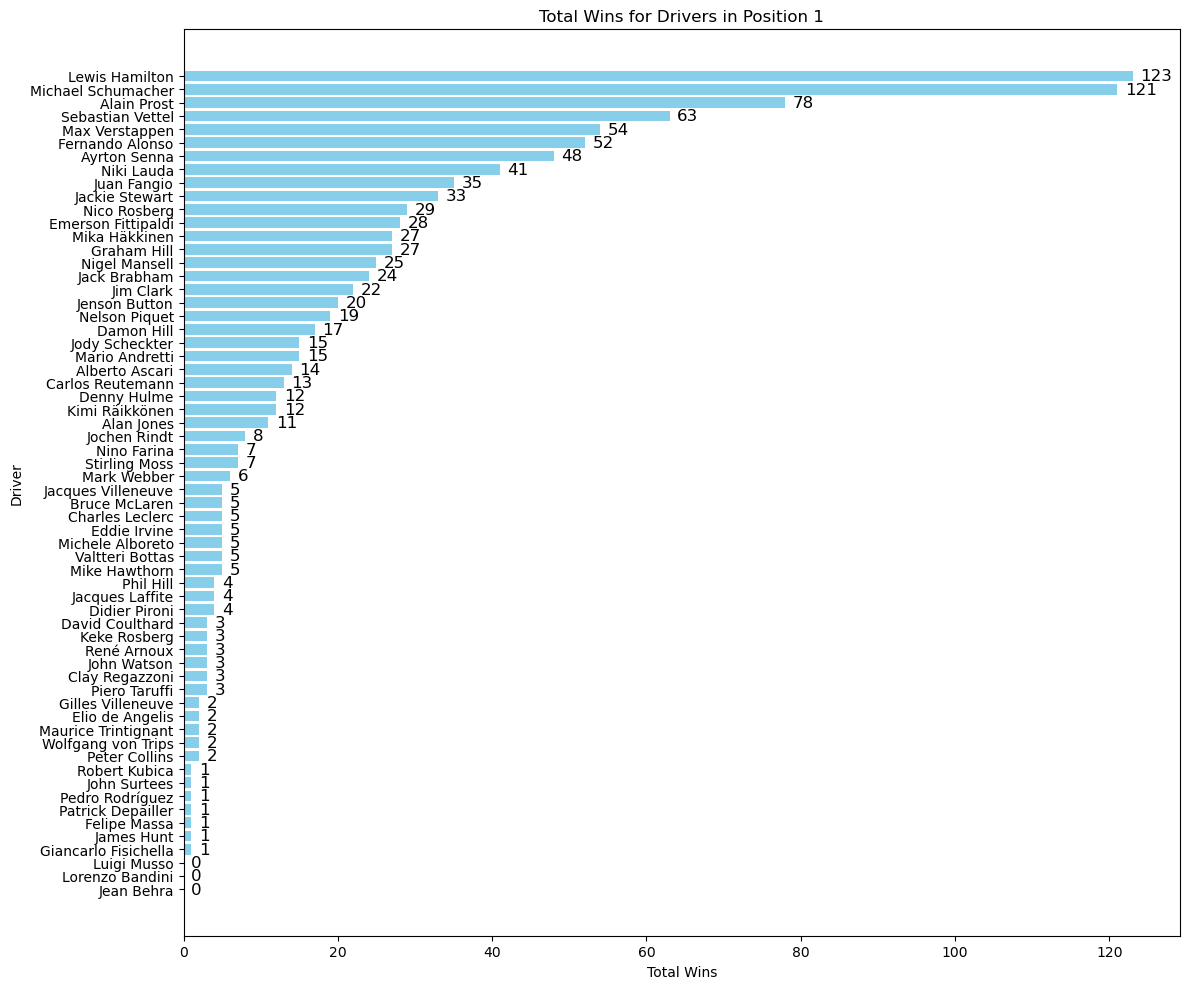

In [184]:
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'win' column in descending order
wins_position_1_sorted = wins_position_1.sort_values(by='win', ascending=False)

# Increase the figure size
plt.figure(figsize=(12, 10))

# Plotting the horizontal bar chart
bars = plt.barh(wins_position_1_sorted['driver_fullname'], wins_position_1_sorted['win'], color='skyblue')

# Adding labels to the bars with adjusted font size
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}',
             va='center', ha='left', fontsize=12, color='black')

plt.xlabel('Total Wins')
plt.ylabel('Driver')
plt.title('Total Wins for Drivers in Position 1')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest wins at the top
plt.tight_layout()  # Adjust layout to prevent cropping
plt.show()



### Correlation matrix to see if really drivers position are good in their home races

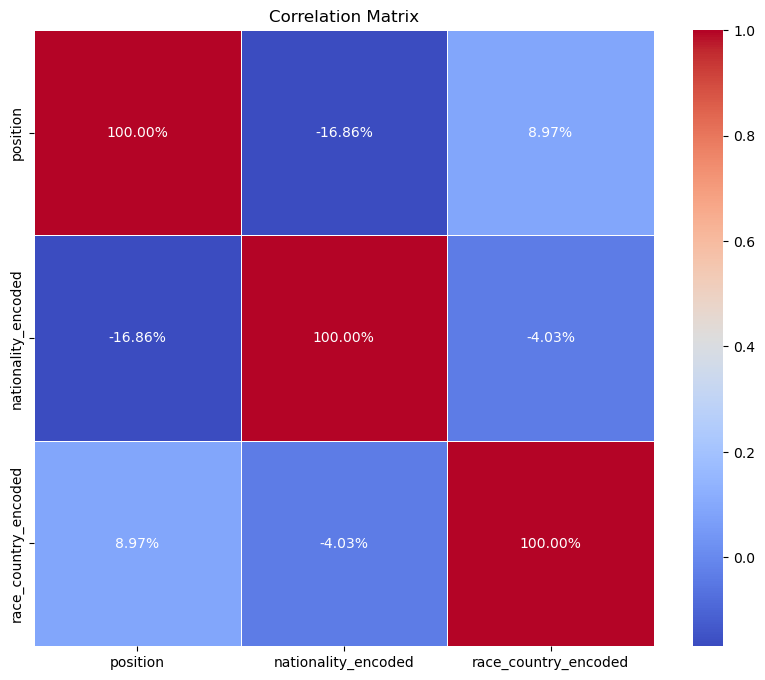

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_driver_standings is your DataFrame
# Encode categorical variables (nationality and race country)
merged_driver_standings['nationality_encoded'] = pd.Categorical(merged_driver_standings['driver_nationality']).codes
merged_driver_standings['race_country_encoded'] = pd.Categorical(merged_driver_standings['Race_country']).codes

# Select columns for correlation analysis
selected_columns_for_correlation = ['position', 'nationality_encoded', 'race_country_encoded']

# Create a new DataFrame with selected columns
correlation_data = merged_driver_standings[selected_columns_for_correlation]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap with percentage values
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2%", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



### Correlation between position & race country and we can see that there is a 9% correlation between race country & drivers position

## Hence, there is 9% chance that drivers perform good in their countries

### Top 5 Drivers for each and every year 

In [37]:
# Assuming merged_driver_standings is your DataFrame
# Filter to include only rows where the position is 1
position_1_data = merged_driver_standings[merged_driver_standings['position'] == 1]

# Group by year and driver, calculate total wins, and sort the data
top_5_drivers_by_year = position_1_data.groupby(['year', 'driverId', 'driver_fullname'])['win'].sum().reset_index()
top_5_drivers_by_year = top_5_drivers_by_year.sort_values(by=['year', 'win'], ascending=[True, False])

# Select the top 5 drivers for each year
top_5_drivers_by_year = top_5_drivers_by_year.groupby('year').head(5)

# Display the result
print(top_5_drivers_by_year)


     year  driverId  driver_fullname  win
1    1950       642      Nino Farina    6
0    1950       579      Juan Fangio    1
2    1951       579      Juan Fangio    7
3    1951       642      Nino Farina    1
5    1952       647   Alberto Ascari    5
..    ...       ...              ...  ...
162  2021       830   Max Verstappen   15
161  2021         1   Lewis Hamilton    7
163  2022       830   Max Verstappen   17
164  2022       844  Charles Leclerc    5
165  2023       830   Max Verstappen   22

[165 rows x 4 columns]


### Bar charts to see top drivers each & every year

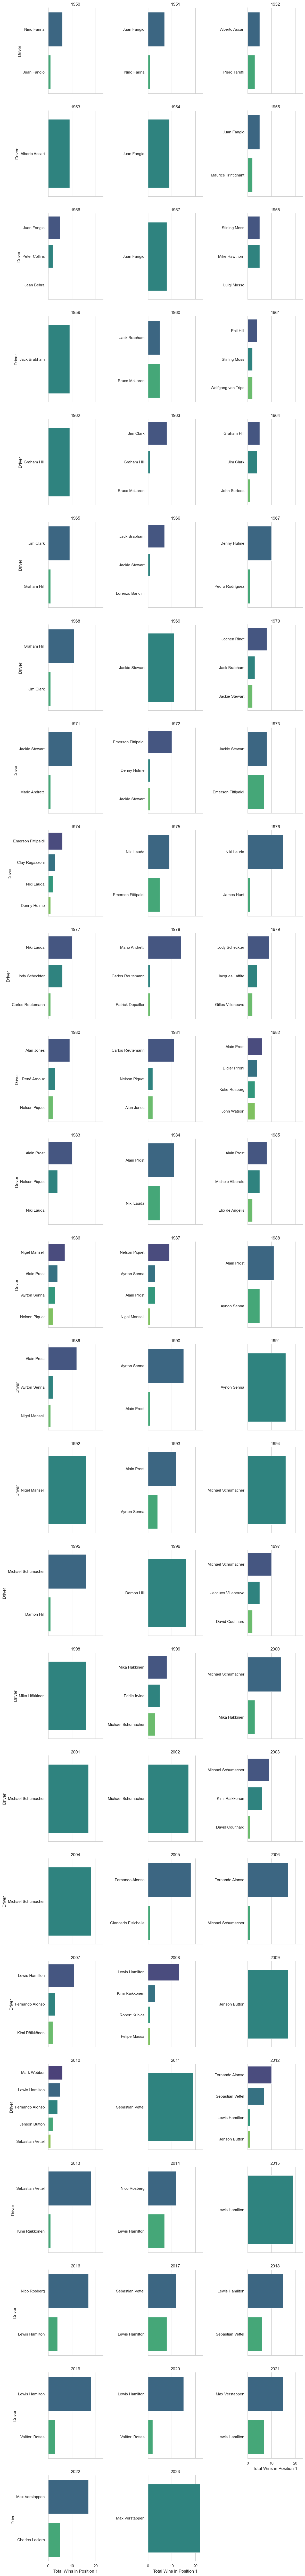

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Rest of the code...
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar chart for each year
g = sns.FacetGrid(top_5_drivers_by_year, col="year", col_wrap=3, height=4, sharey=False)
g.map(sns.barplot, 'win', 'driver_fullname', palette='viridis', ci=None)
g.set_axis_labels('Total Wins in Position 1', 'Driver')
g.set_titles(col_template="{col_name}")
g.tight_layout()
plt.show()






### Performing a gamma distribution on drivers win in position 1

C:\Users\moins\AppData\Local\Temp\ipykernel_16976\2937658130.py:15: RuntimeWarning: invalid value encountered in scalar power
  return (beta**alpha / math_gamma(alpha)) * x**(alpha - 1) * np.exp(-beta * x)
C:\Users\moins\AppData\Local\Temp\ipykernel_16976\2937658130.py:15: RuntimeWarning: invalid value encountered in power
  return (beta**alpha / math_gamma(alpha)) * x**(alpha - 1) * np.exp(-beta * x)


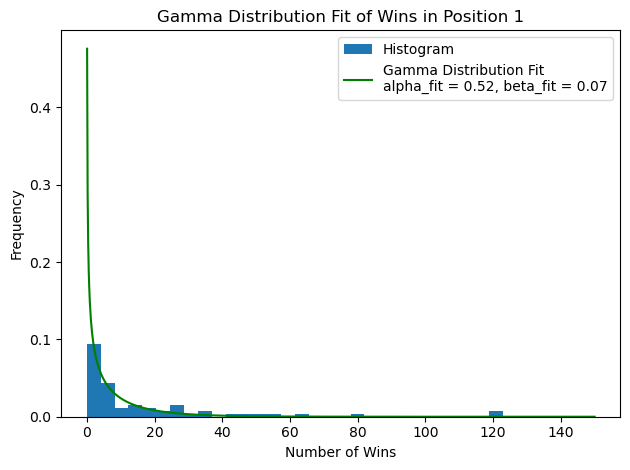

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import gamma as math_gamma

# Assuming you have the "wins_position_1" DataFrame loaded
# If not, you can load it using: wins_position_1 = pd.read_csv('your_file.csv')

# Extract the 'win' column
data_win = wins_position_1['win']

# Define the gamma probability density function
def gamma_pdf(x, alpha, beta):
    return (beta**alpha / math_gamma(alpha)) * x**(alpha - 1) * np.exp(-beta * x)

# Create histogram
hist, bin_edges = np.histogram(data_win, density=True, bins=30)

# Get bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fit the gamma distribution using curve_fit
params, covariance = curve_fit(gamma_pdf, bin_centers, hist)

# Extract alpha and beta parameters
alpha_fit, beta_fit = params

# Create a histogram of the data
plt.hist(data_win, density=True, bins=30, label='Histogram')

# Define the range for the x-axis
x_win = np.linspace(-10, 150, 1000)

# Plot the fitted gamma distribution
plt.plot(x_win, gamma_pdf(x_win, alpha_fit, beta_fit), 'g', label=f'Gamma Distribution Fit\nalpha_fit = {alpha_fit:.2f}, beta_fit = {beta_fit:.2f}')

plt.xlabel('Number of Wins')
plt.ylabel('Frequency')
plt.title('Gamma Distribution Fit of Wins in Position 1')
plt.legend()
plt.tight_layout()
plt.show()


### Conclusion - Wins in first position follow a gamma distribution

### Conducting bayesian statistics using PYMC, doing Gamma distribution on win rate, and also introducing time factor variable by using year column and modeling it Exponentially & Wins observed are modelled using poisson distribution 
### posterior distribution for top 3 drivers Max verstappen, Lewis Hamilton & Charles Lecrec 

C:\Users\moins\AppData\Local\Temp\ipykernel_16976\218100830.py:37: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(1000, tune=1000, start=start)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [win_rate_overall, time_factor]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


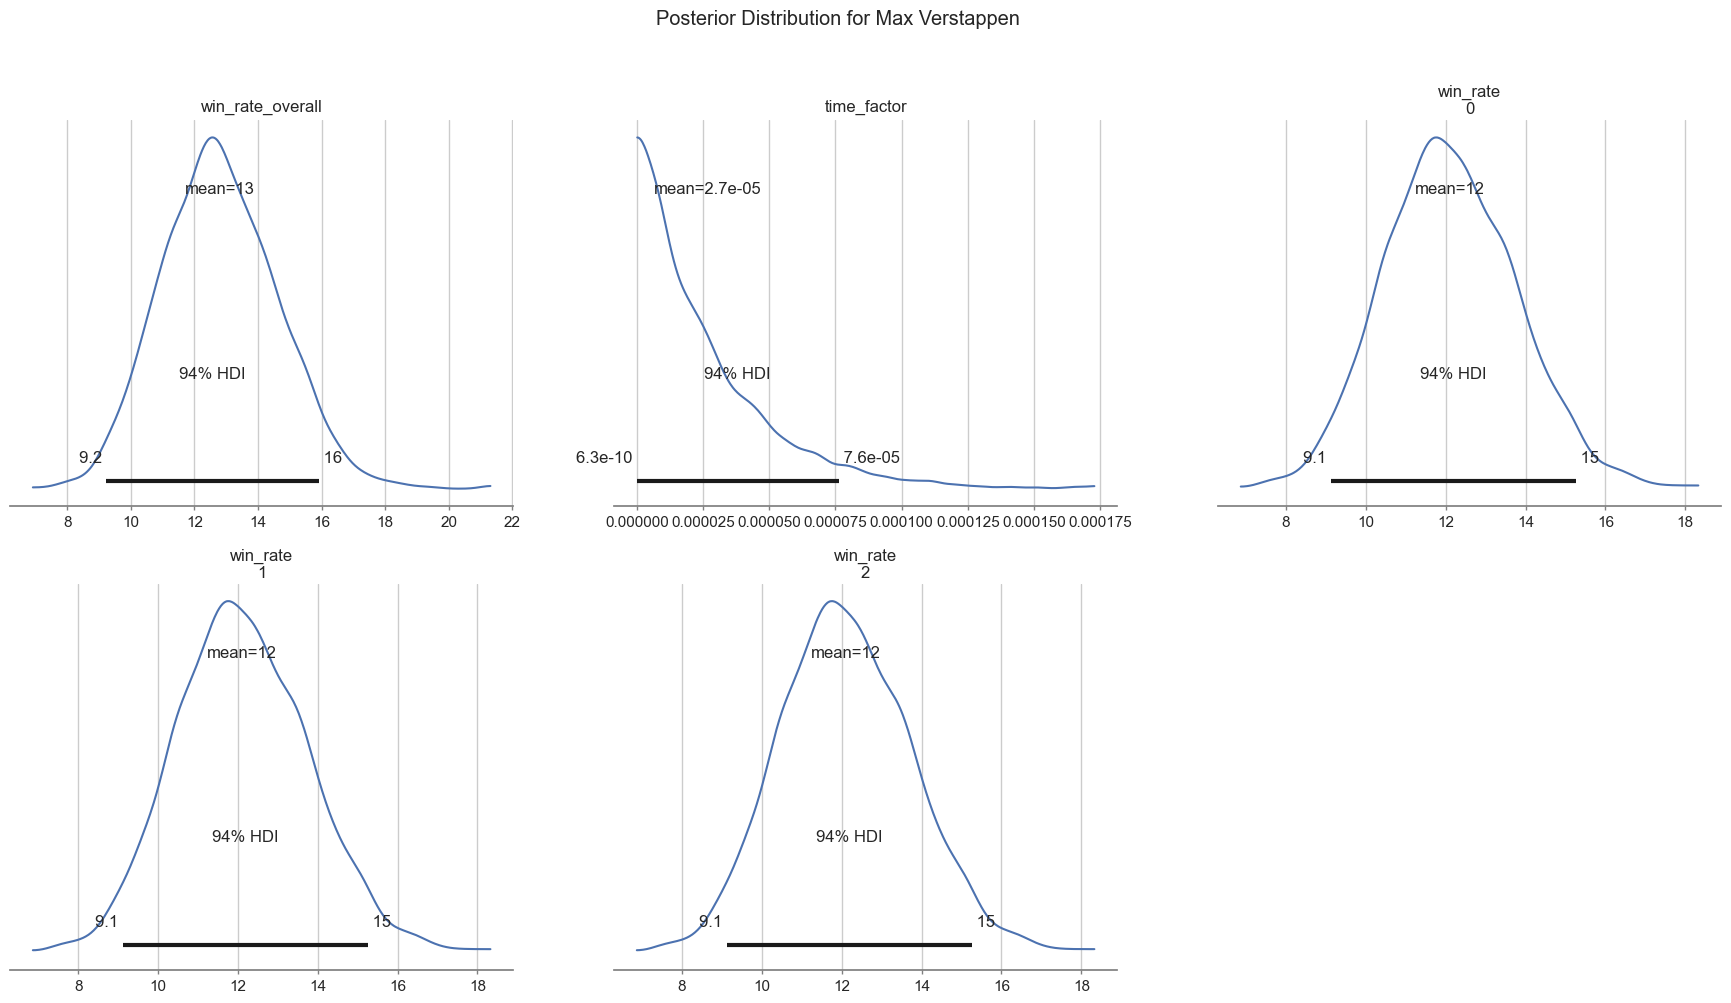

C:\Users\moins\AppData\Local\Temp\ipykernel_16976\218100830.py:37: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(1000, tune=1000, start=start)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [win_rate_overall, time_factor]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.


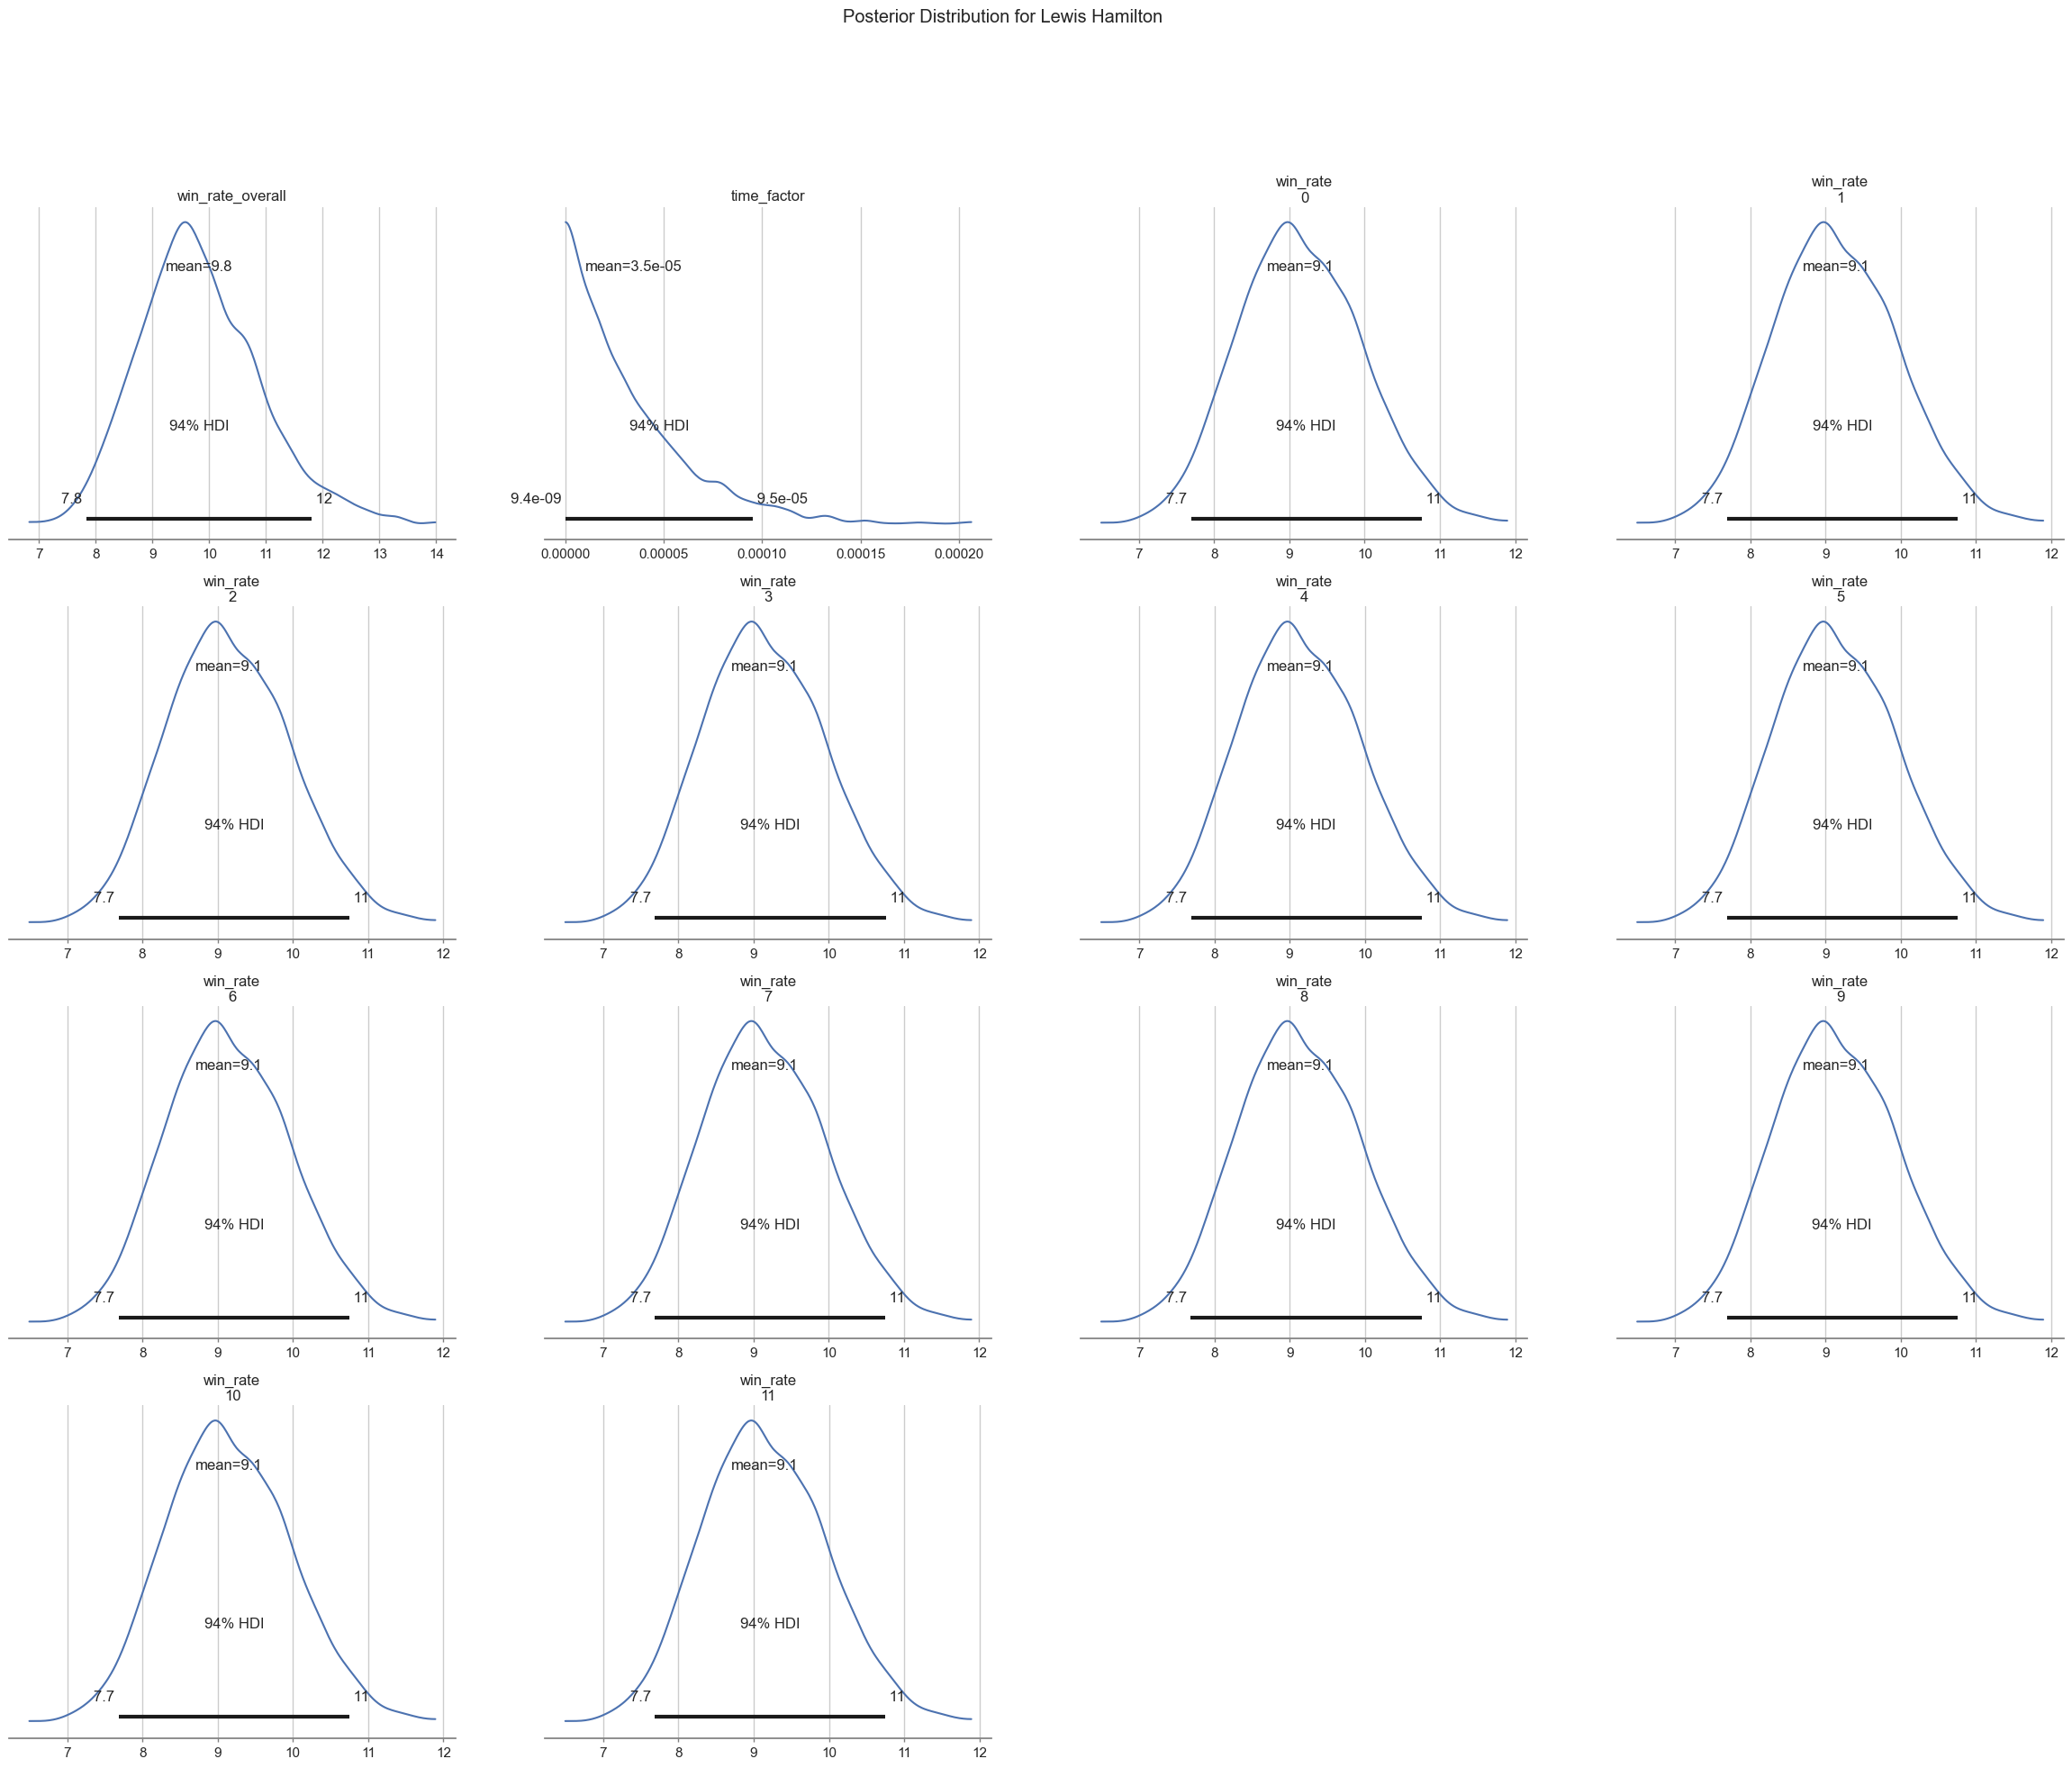

C:\Users\moins\AppData\Local\Temp\ipykernel_16976\218100830.py:37: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(1000, tune=1000, start=start)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [win_rate_overall, time_factor]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


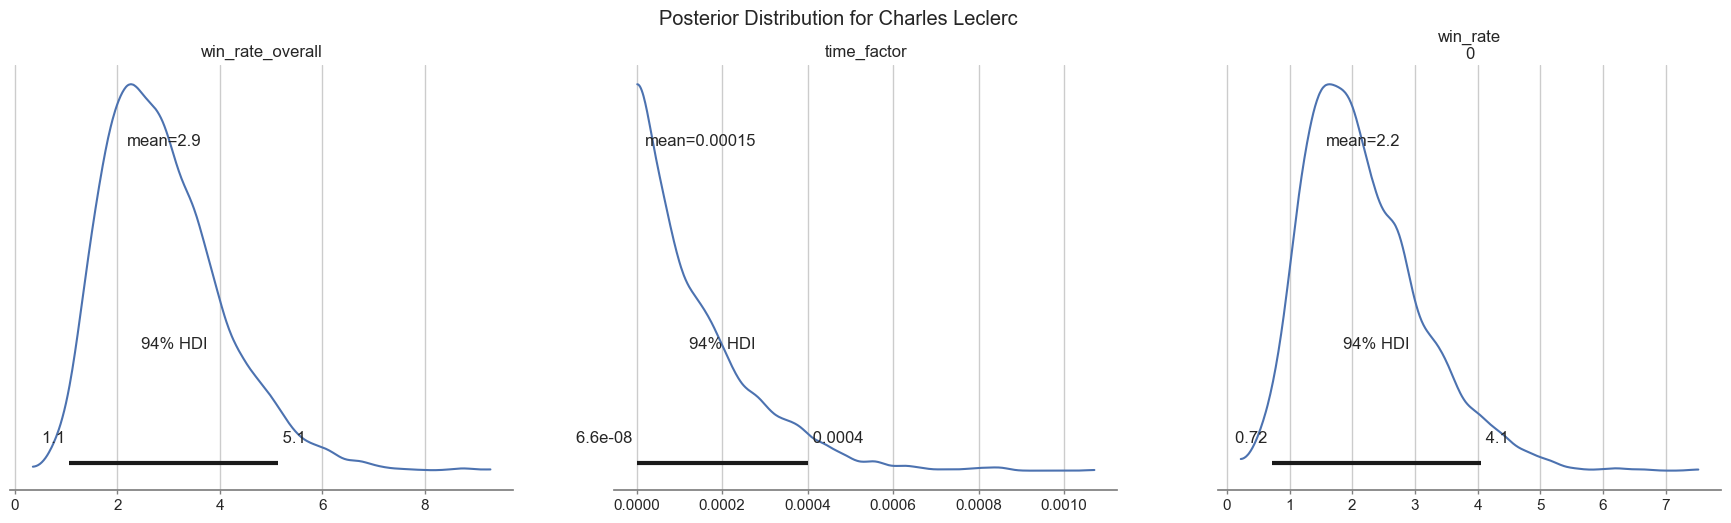

In [43]:
import pymc as pm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# For simplicity, let's focus on one driver (you can extend this for multiple drivers)

# List of drivers
drivers = ['Max Verstappen', 'Lewis Hamilton', 'Charles Leclerc']

for driver_name in drivers:
    driver_data = top_5_drivers_by_year[top_5_drivers_by_year['driver_fullname'] == driver_name]

    # Bayesian Model
    with pm.Model() as driver_model:
        # Prior for the overall win rate (lambda) - assuming a Gamma distribution
        alpha = 1.5  # you can adjust based on your belief
        beta = 1.5   # you can adjust based on your belief
        win_rate_overall = pm.Gamma('win_rate_overall', alpha=alpha, beta=beta)

        # Prior for the time-dependent win rate
        # Assuming an Exponential distribution for simplicity
        time_factor = pm.Exponential('time_factor', lam=0.1)

        # Calculating the time-dependent win rate
        win_rate = pm.Deterministic('win_rate', win_rate_overall * pm.math.exp(-time_factor * driver_data['year']))

        # Likelihood - Poisson distribution for wins
        wins_observed = pm.Poisson('wins_observed', mu=win_rate, observed=driver_data['win'].values)

        # Manually setting better initial values
        start = {'win_rate_overall': 1.0, 'time_factor': 0.1}

    # MCMC Sampling
    with driver_model:
        trace = pm.sample(1000, tune=1000, start=start)

    # Visualize the posterior distribution
    pm.plot_posterior(trace)
    plt.suptitle(f'Posterior Distribution for {driver_name}')
    plt.show()


## Conclusion : As we can see the highest win rate is for Max verstappen, so we can see more Max verstappen domination in 2024

## Part B: Now lets see if people sentiments when the Teams win using Sentiment analysis by peoples Tweets

In [91]:
import requests
from wordcloud import WordCloud

In [80]:
twitter_data=[]

### This code will fetch tweets for whatever query we put

In [81]:
payload = {
    'api_key' : '',
    'query': 'Max verstappen loses',
    'num' : '25000'
}

response = requests.get(
    'https://api.scraperapi.com/structured/twitter/search', params = payload
)
data = response.json()
data

{'search_information': {'query_displayed': 'site:twitter.com "Max verstappen loses"',
  'total_results': 102,
  'time_taken_displayed': 0.21},
 'organic_results': [{'position': 0,
   'title': 'Formula 1',
   'snippet': 'Max Verstappen loses the rear at Turn 10 and flies into the barriers #AustrianGP #F1.',
   'highlighs': ['Max Verstappen loses'],
   'link': 'https://twitter.com/F1/status/1144601167835607040',
   'displayed_link': 'https://twitter.com › status'},
  {'position': 1,
   'title': 'Formula 1',
   'snippet': 'Max Verstappen loses the rear at Turn 10 and flies into the barriers #AustrianGP #F1.',
   'highlighs': ['Max Verstappen loses'],
   'link': 'https://twitter.com/f1/status/1144601167835607040?lang=ca',
   'displayed_link': 'https://twitter.com › status'},
  {'position': 2,
   'title': 'Max Verstappen loses pole position for Mexican GP after failing ...',
   'snippet': 'Max Verstappen loses pole position for Mexican GP after failing to slow for yellow flag. The Red Bull 

In [82]:
all_tweets = data['organic_results']
for tweet in all_tweets:
    twitter_data.append(tweet)

#### Preprocessing the Data

In [83]:
df = pd.DataFrame(twitter_data)
columns_to_drop = ["highlighs", "link","displayed_link","title","position"]
df = df.drop(columns=columns_to_drop, axis=1)
df

,snippet,sitelinks
0,Max Verstappen loses the rear at Turn 10 and f...,NaN
1,Max Verstappen loses the rear at Turn 10 and f...,NaN
2,Max Verstappen loses pole position for Mexican...,NaN
3,Max Verstappen loses the rear at Turn 10 and f...,"{'inline': [{'title': 'Translate this page', '..."
4,The big Formula One race is on Sunday in Austi...,NaN
5,So Max Verstappen loses pole yesterday because...,NaN
6,"Another week, another #F1 gossip column 🗣️ - #...",NaN
7,... /f1/news/12433/11846220/max-verstappen-los...,NaN
8,... in 2014-2016. You had the best car for mos...,NaN


#### cleaning the data which will be helpful when we make wordcloud

In [84]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['snippet'] = df['snippet'].apply(cleanTxt)

# Show the cleaned tweets
df

,snippet,sitelinks
0,Max Verstappen loses the rear at Turn 10 and f...,NaN
1,Max Verstappen loses the rear at Turn 10 and f...,NaN
2,Max Verstappen loses pole position for Mexican...,NaN
3,Max Verstappen loses the rear at Turn 10 and f...,"{'inline': [{'title': 'Translate this page', '..."
4,The big Formula One race is on Sunday in Austi...,NaN
5,So Max Verstappen loses pole yesterday because...,NaN
6,"Another week, another F1 gossip column 🗣️ - F1...",NaN
7,... /f1/news/12433/11846220/max-verstappen-los...,NaN
8,... in 2014-2016. You had the best car for mos...,NaN


#### Getting the Subjectivity & Polarity of the data using TextBlob Library

In [85]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['snippet'].apply(getSubjectivity)
df['Polarity'] = df['snippet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,snippet,sitelinks,Subjectivity,Polarity
0,Max Verstappen loses the rear at Turn 10 and f...,NaN,0.10,-0.300000
1,Max Verstappen loses the rear at Turn 10 and f...,NaN,0.10,-0.300000
2,Max Verstappen loses pole position for Mexican...,NaN,0.10,-0.120000
3,Max Verstappen loses the rear at Turn 10 and f...,"{'inline': [{'title': 'Translate this page', '...",0.10,-0.300000
4,The big Formula One race is on Sunday in Austi...,NaN,0.40,0.066667
5,So Max Verstappen loses pole yesterday because...,NaN,0.20,0.066667
6,"Another week, another F1 gossip column 🗣️ - F1...",NaN,0.10,-0.300000
7,... /f1/news/12433/11846220/max-verstappen-los...,NaN,0.00,0.000000
8,... in 2014-2016. You had the best car for mos...,NaN,0.24,0.245000


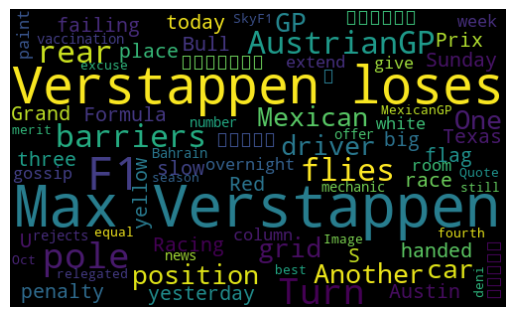

In [92]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['snippet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Based on the polarity concluding if its Positive, Negative or Neutral tweet

In [88]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,snippet,sitelinks,Subjectivity,Polarity,Analysis
0,Max Verstappen loses the rear at Turn 10 and f...,NaN,0.10,-0.300000,Negative
1,Max Verstappen loses the rear at Turn 10 and f...,NaN,0.10,-0.300000,Negative
2,Max Verstappen loses pole position for Mexican...,NaN,0.10,-0.120000,Negative
3,Max Verstappen loses the rear at Turn 10 and f...,"{'inline': [{'title': 'Translate this page', '...",0.10,-0.300000,Negative
4,The big Formula One race is on Sunday in Austi...,NaN,0.40,0.066667,Positive
5,So Max Verstappen loses pole yesterday because...,NaN,0.20,0.066667,Positive
6,"Another week, another F1 gossip column 🗣️ - F1...",NaN,0.10,-0.300000,Negative
7,... /f1/news/12433/11846220/max-verstappen-los...,NaN,0.00,0.000000,Neutral
8,... in 2014-2016. You had the best car for mos...,NaN,0.24,0.245000,Positive


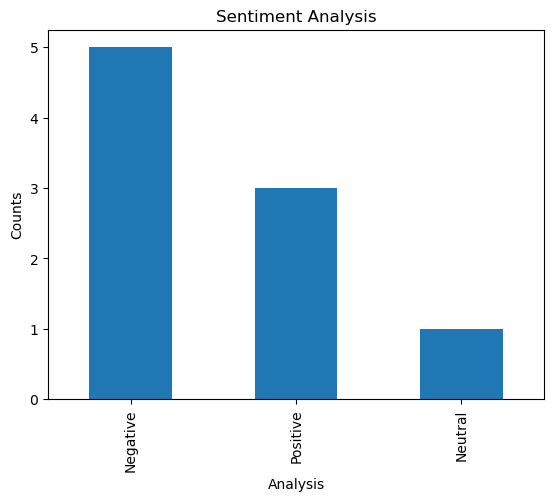

In [89]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()